# Importing the necessary libraries:


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# Loading dataset

In [186]:
#Load the dataset:
df = pd.read_csv('health_status.csv')


# Understanding the Information on dataset

In [187]:
df

District Name  GoN Hospital   PHCC  Health Post  PHC/ORC  EPI Clinics   
0        National           123  200.0         3808    12180        16022  \
1      Province 1            18   41.0          648     2189         2787   
2    01 TAPLEJUNG             1    2.0           50      176          179   
3    02 PANCHTHAR             1    2.0           40      147          217   
4         03 ILAM             1    4.0           44      185          187   
..            ...           ...    ...          ...      ...          ...   
80     71 KAILALI             3    4.0           37      183          242   
81  72 KANCHANPUR             1    3.0           18       72          138   
82  73 DADELDHURA             2    NaN           24       74           93   
83     74 BAITADI             1    2.0           65      315          330   
84   75 DARCHAULA             2    NaN           40      154          137   

    FCHVs   BCG  DPT-Hep B-Hib3rd  OPV-3rd  PCV 3rd  MR 1stDose  
0   49001  91.3                87     85.9       78          84  
1    8578  92.0                87     86.0       82          84  
2     896  96.0                92     91.0       77          89  
3     394  89.0                91     90.0       87          90  
4    1057  77.0                75     74.0       68          70  
..    ...   ...               ...      ...      ...         ...  
80   1062  78.0                76     77.0       74          77  
81    773  81.0                79     79.0       75          76  
82    456  82.0                80     80.0       80          80  
83    831  88.0                85     85.0       71          89  
84    369  87.0                88     87.0       74          88  

[85 rows x 12 columns]

In [188]:
# Display the shape of the dataset
print(df.shape)

(85, 12)


In [189]:
df.columns

Index(['District Name', 'GoN Hospital', 'PHCC', 'Health Post', 'PHC/ORC',
       'EPI Clinics', 'FCHVs', 'BCG', 'DPT-Hep B-Hib3rd', 'OPV-3rd', 'PCV 3rd',
       'MR 1stDose'],
      dtype='object')

In [190]:
# Display the info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District Name     85 non-null     object 
 1   GoN Hospital      85 non-null     int64  
 2   PHCC              80 non-null     float64
 3   Health Post       85 non-null     int64  
 4   PHC/ORC           85 non-null     int64  
 5   EPI Clinics       85 non-null     int64  
 6   FCHVs             85 non-null     int64  
 7   BCG               85 non-null     float64
 8   DPT-Hep B-Hib3rd  85 non-null     int64  
 9   OPV-3rd           85 non-null     float64
 10  PCV 3rd           85 non-null     int64  
 11  MR 1stDose        85 non-null     int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 8.1+ KB
None


In [191]:
# display basic descriptive statistics for numerical columns
df.describe()

GoN Hospital        PHCC  Health Post       PHC/ORC   EPI Clinics   
count     85.000000   80.000000    85.000000     85.000000     85.000000  \
mean       4.341176    7.500000   134.400000    429.882353    565.482353   
std       13.986859   23.251514   428.144146   1369.699840   1804.606807   
min        0.000000    1.000000    13.000000     10.000000     20.000000   
25%        1.000000    2.000000    36.000000     98.000000    145.000000   
50%        1.000000    3.000000    49.000000    164.000000    206.000000   
75%        2.000000    4.000000    72.000000    235.000000    287.000000   
max      123.000000  200.000000  3808.000000  12180.000000  16022.000000   

              FCHVs         BCG  DPT-Hep B-Hib3rd     OPV-3rd     PCV 3rd   
count     85.000000   85.000000         85.000000   85.000000   85.000000  \
mean    1729.447059   88.050588         86.870588   86.175294   78.329412   
std     5509.626095   17.867792         12.666781   12.295178   10.039669   
min      118.000000   28.000000         46.000000   46.000000   46.000000   
25%      425.000000   78.000000         79.000000   79.000000   73.000000   
50%      654.000000   89.000000         87.000000   86.000000   79.000000   
75%      959.000000  100.000000         95.000000   94.000000   84.000000   
max    49001.000000  136.000000        136.000000  131.000000  115.000000   

       MR 1stDose  
count   85.000000  
mean    84.858824  
std     11.395648  
min     50.000000  
25%     78.000000  
50%     84.000000  
75%     91.000000  
max    133.000000

In [192]:
#Selecting number data type for finding out correlation
num_df=df.select_dtypes(include='number')
num_df.corr()

GoN Hospital      PHCC  Health Post   PHC/ORC  EPI Clinics   
GoN Hospital          1.000000  0.989697     0.983487  0.981853     0.980050  \
PHCC                  0.989697  1.000000     0.995847  0.994891     0.994493   
Health Post           0.983487  0.995847     1.000000  0.999283     0.999087   
PHC/ORC               0.981853  0.994891     0.999283  1.000000     0.999434   
EPI Clinics           0.980050  0.994493     0.999087  0.999434     1.000000   
FCHVs                 0.989304  0.996840     0.997017  0.997031     0.996048   
BCG                   0.037024  0.035856     0.043037  0.047530     0.053576   
DPT-Hep B-Hib3rd     -0.034958 -0.022381     0.005708  0.010243     0.015334   
OPV-3rd              -0.038350 -0.028845     0.003579  0.008905     0.013983   
PCV 3rd              -0.015222 -0.027441    -0.011694 -0.005458    -0.005361   
MR 1stDose           -0.042566 -0.041488    -0.011132 -0.005003    -0.002635   

                     FCHVs       BCG  DPT-Hep B-Hib3rd   OPV-3rd   PCV 3rd   
GoN Hospital      0.989304  0.037024         -0.034958 -0.038350 -0.015222  \
PHCC              0.996840  0.035856         -0.022381 -0.028845 -0.027441   
Health Post       0.997017  0.043037          0.005708  0.003579 -0.011694   
PHC/ORC           0.997031  0.047530          0.010243  0.008905 -0.005458   
EPI Clinics       0.996048  0.053576          0.015334  0.013983 -0.005361   
FCHVs             1.000000  0.035566         -0.013214 -0.015099 -0.008424   
BCG               0.035566  1.000000          0.810065  0.794196  0.540239   
DPT-Hep B-Hib3rd -0.013214  0.810065          1.000000  0.990884  0.669390   
OPV-3rd          -0.015099  0.794196          0.990884  1.000000  0.682626   
PCV 3rd          -0.008424  0.540239          0.669390  0.682626  1.000000   
MR 1stDose       -0.024930  0.767280          0.959701  0.960647  0.747213   

                  MR 1stDose  
GoN Hospital       -0.042566  
PHCC               -0.041488  
Health Post        -0.011132  
PHC/ORC            -0.005003  
EPI Clinics        -0.002635  
FCHVs              -0.024930  
BCG                 0.767280  
DPT-Hep B-Hib3rd    0.959701  
OPV-3rd             0.960647  
PCV 3rd             0.747213  
MR 1stDose          1.000000

In [193]:
print(df.groupby(['District Name','GoN Hospital']).groups)

{('01 TAPLEJUNG', 1): [2], ('02 PANCHTHAR', 1): [3], ('03 ILAM', 1): [4], ('04 JHAPA', 1): [5], ('05 MORANG', 3): [6], ('06 SUNSARI', 2): [7], ('07 DHANKUTA', 1): [8], ('08 TERHATHUM', 1): [9], ('09 SANKHUWASABHA', 1): [10], ('10 BHOJPUR', 1): [11], ('11 SOLUKHUMBU', 1): [12], ('12 OKHALDHUNGA', 1): [13], ('13 KHOTANG', 1): [14], ('14 UDAYAPUR', 2): [15], ('15 SAPTARI', 2): [17], ('16 SIRAHA', 2): [18], ('17 DHANUSA', 1): [19], ('18 MAHOTTARI', 2): [20], ('19 SARLAHI', 1): [21], ('20 SINDHULI', 1): [26], ('21 RAMECHHAP', 1): [27], ('22 DOLAKHA', 1): [28], ('23 SINDHUPALCHOK', 1): [29], ('24 KAVRE', 2): [30], ('25 LALITPUR', 3): [31], ('26 BHAKTAPUR', 3): [32], ('27 KATHMANDU', 14): [33], ('28 NUWAKOT', 1): [34], ('29 RASUWA', 1): [35], ('30 DHADING', 1): [36], ('31 MAKWANPUR', 1): [37], ('32 RAUTAHAT', 2): [22], ('33 BARA', 1): [23], ('34 PARSA', 2): [24], ('35 CHITAWAN', 4): [38], ('36 GORKHA', 1): [40], ('37 LAMJUNG', 1): [41], ('38 TANAHU', 3): [42], ('39 SYANGJA', 1): [43], ('40 KA

# Data Cleaning :


# Adding new column named 'Provinces'

In [194]:
# Create a list of province names
provinces = ['1'] * 16 + ['2'] * 9 + ['3'] * 14 + ['4'] * 12 + ['5'] * 13 + ['6'] * 11 + ['7'] * 10

# Add the 'Provinces' column to the DataFrame
df['Provinces'] = provinces

# Converting Upper Case to Lower Case

In [195]:
# Change the 'District Name' column to lowercase
df['District Name'] = df['District Name'].str.lower()
df

District Name  GoN Hospital   PHCC  Health Post  PHC/ORC  EPI Clinics   
0        national           123  200.0         3808    12180        16022  \
1      province 1            18   41.0          648     2189         2787   
2    01 taplejung             1    2.0           50      176          179   
3    02 panchthar             1    2.0           40      147          217   
4         03 ilam             1    4.0           44      185          187   
..            ...           ...    ...          ...      ...          ...   
80     71 kailali             3    4.0           37      183          242   
81  72 kanchanpur             1    3.0           18       72          138   
82  73 dadeldhura             2    NaN           24       74           93   
83     74 baitadi             1    2.0           65      315          330   
84   75 darchaula             2    NaN           40      154          137   

    FCHVs   BCG  DPT-Hep B-Hib3rd  OPV-3rd  PCV 3rd  MR 1stDose Provinces  
0   49001  91.3                87     85.9       78          84         1  
1    8578  92.0                87     86.0       82          84         1  
2     896  96.0                92     91.0       77          89         1  
3     394  89.0                91     90.0       87          90         1  
4    1057  77.0                75     74.0       68          70         1  
..    ...   ...               ...      ...      ...         ...       ...  
80   1062  78.0                76     77.0       74          77         7  
81    773  81.0                79     79.0       75          76         7  
82    456  82.0                80     80.0       80          80         7  
83    831  88.0                85     85.0       71          89         7  
84    369  87.0                88     87.0       74          88         7  

[85 rows x 13 columns]

# Dropping rows

In [196]:
#Removing multiple rows which consists of one National row and seven Provinces Row
df = df.drop(df[df['District Name'] == 'national'].index)
df = df.drop(df[df['District Name'] == 'province 1'].index)
df = df.drop(df[df['District Name'] == 'province 2'].index)
df = df.drop(df[df['District Name'] == 'province 3'].index)
df = df.drop(df[df['District Name'] == 'province 4'].index)
df = df.drop(df[df['District Name'] == 'province 5'].index)
df = df.drop(df[df['District Name'] == 'province 6'].index)
df = df.drop(df[df['District Name'] == 'province 7'].index)

# Save the modified DataFrame as a new CSV file
df.to_csv('final.csv', index=False)

In [197]:
# Display the shape of the dataset
print(df.shape)

(77, 13)


In [198]:
#Check for duplicates:
print(df.duplicated().sum())

0


In [199]:
#Resetting index
df = df.reset_index(drop=True)
df

District Name  GoN Hospital  PHCC  Health Post  PHC/ORC  EPI Clinics   
0    01 taplejung             1   2.0           50      176          179  \
1    02 panchthar             1   2.0           40      147          217   
2         03 ilam             1   4.0           44      185          187   
3        04 jhapa             1   6.0           44      187          250   
4       05 morang             3   6.0           60      258          360   
..            ...           ...   ...          ...      ...          ...   
72     71 kailali             3   4.0           37      183          242   
73  72 kanchanpur             1   3.0           18       72          138   
74  73 dadeldhura             2   NaN           24       74           93   
75     74 baitadi             1   2.0           65      315          330   
76   75 darchaula             2   NaN           40      154          137   

    FCHVs    BCG  DPT-Hep B-Hib3rd  OPV-3rd  PCV 3rd  MR 1stDose Provinces  
0     896   96.0                92     91.0       77          89         1  
1     394   89.0                91     90.0       87          90         1  
2    1057   77.0                75     74.0       68          70         1  
3     586   96.0                91     91.0       87          88         1  
4     722  100.0                91     88.0       84          85         1  
..    ...    ...               ...      ...      ...         ...       ...  
72   1062   78.0                76     77.0       74          77         7  
73    773   81.0                79     79.0       75          76         7  
74    456   82.0                80     80.0       80          80         7  
75    831   88.0                85     85.0       71          89         7  
76    369   87.0                88     87.0       74          88         7  

[77 rows x 13 columns]

# Checking for null values

In [200]:
#Checking missing value
print(df.isnull().sum())

District Name       0
GoN Hospital        0
PHCC                5
Health Post         0
PHC/ORC             0
EPI Clinics         0
FCHVs               0
BCG                 0
DPT-Hep B-Hib3rd    0
OPV-3rd             0
PCV 3rd             0
MR 1stDose          0
Provinces           0
dtype: int64


# Replacing Null Values using Mean Imputation

In [201]:
#Calculating mean of column with null values
mean = df["PHCC"].mean()

#Replacing null values with mean
df["PHCC"].fillna(mean, inplace=True)

In [202]:
#Checking missing value
print(df.isnull().sum())

District Name       0
GoN Hospital        0
PHCC                0
Health Post         0
PHC/ORC             0
EPI Clinics         0
FCHVs               0
BCG                 0
DPT-Hep B-Hib3rd    0
OPV-3rd             0
PCV 3rd             0
MR 1stDose          0
Provinces           0
dtype: int64


In [203]:
df

District Name  GoN Hospital      PHCC  Health Post  PHC/ORC  EPI Clinics   
0    01 taplejung             1  2.000000           50      176          179  \
1    02 panchthar             1  2.000000           40      147          217   
2         03 ilam             1  4.000000           44      185          187   
3        04 jhapa             1  6.000000           44      187          250   
4       05 morang             3  6.000000           60      258          360   
..            ...           ...       ...          ...      ...          ...   
72     71 kailali             3  4.000000           37      183          242   
73  72 kanchanpur             1  3.000000           18       72          138   
74  73 dadeldhura             2  2.777778           24       74           93   
75     74 baitadi             1  2.000000           65      315          330   
76   75 darchaula             2  2.777778           40      154          137   

    FCHVs    BCG  DPT-Hep B-Hib3rd  OPV-3rd  PCV 3rd  MR 1stDose Provinces  
0     896   96.0                92     91.0       77          89         1  
1     394   89.0                91     90.0       87          90         1  
2    1057   77.0                75     74.0       68          70         1  
3     586   96.0                91     91.0       87          88         1  
4     722  100.0                91     88.0       84          85         1  
..    ...    ...               ...      ...      ...         ...       ...  
72   1062   78.0                76     77.0       74          77         7  
73    773   81.0                79     79.0       75          76         7  
74    456   82.0                80     80.0       80          80         7  
75    831   88.0                85     85.0       71          89         7  
76    369   87.0                88     87.0       74          88         7  

[77 rows x 13 columns]

# Exploratory Data Analysis (EDA)
# Correlation between all the features within the dataset

In [204]:
#Correlation between all numeric values containing columns
num_df=df.select_dtypes(include='number')
num_df.corr()

GoN Hospital      PHCC  Health Post   PHC/ORC  EPI Clinics   
GoN Hospital          1.000000  0.508822     0.101409  0.070838     0.141375  \
PHCC                  0.508822  1.000000     0.443788  0.407459     0.522302   
Health Post           0.101409  0.443788     1.000000  0.907230     0.898298   
PHC/ORC               0.070838  0.407459     0.907230  1.000000     0.924755   
EPI Clinics           0.141375  0.522302     0.898298  0.924755     1.000000   
FCHVs                 0.416839  0.593979     0.638219  0.627770     0.616205   
BCG                   0.096752  0.102217     0.154258  0.189288     0.272090   
DPT-Hep B-Hib3rd     -0.169553 -0.160667     0.112056  0.142825     0.196251   
OPV-3rd              -0.169443 -0.173160     0.127961  0.169142     0.221701   
PCV 3rd              -0.086309 -0.201350    -0.116292 -0.028012    -0.016432   
MR 1stDose           -0.170792 -0.237824     0.033659  0.098022     0.117548   

                     FCHVs       BCG  DPT-Hep B-Hib3rd   OPV-3rd   PCV 3rd   
GoN Hospital      0.416839  0.096752         -0.169553 -0.169443 -0.086309  \
PHCC              0.593979  0.102217         -0.160667 -0.173160 -0.201350   
Health Post       0.638219  0.154258          0.112056  0.127961 -0.116292   
PHC/ORC           0.627770  0.189288          0.142825  0.169142 -0.028012   
EPI Clinics       0.616205  0.272090          0.196251  0.221701 -0.016432   
FCHVs             1.000000  0.067207         -0.133338 -0.116817 -0.132734   
BCG               0.067207  1.000000          0.808299  0.792272  0.545972   
DPT-Hep B-Hib3rd -0.133338  0.808299          1.000000  0.990607  0.680795   
OPV-3rd          -0.116817  0.792272          0.990607  1.000000  0.694019   
PCV 3rd          -0.132734  0.545972          0.680795  0.694019  1.000000   
MR 1stDose       -0.161165  0.765303          0.959910  0.960800  0.754088   

                  MR 1stDose  
GoN Hospital       -0.170792  
PHCC               -0.237824  
Health Post         0.033659  
PHC/ORC             0.098022  
EPI Clinics         0.117548  
FCHVs              -0.161165  
BCG                 0.765303  
DPT-Hep B-Hib3rd    0.959910  
OPV-3rd             0.960800  
PCV 3rd             0.754088  
MR 1stDose          1.000000

# Heatmap: 

<Axes: >

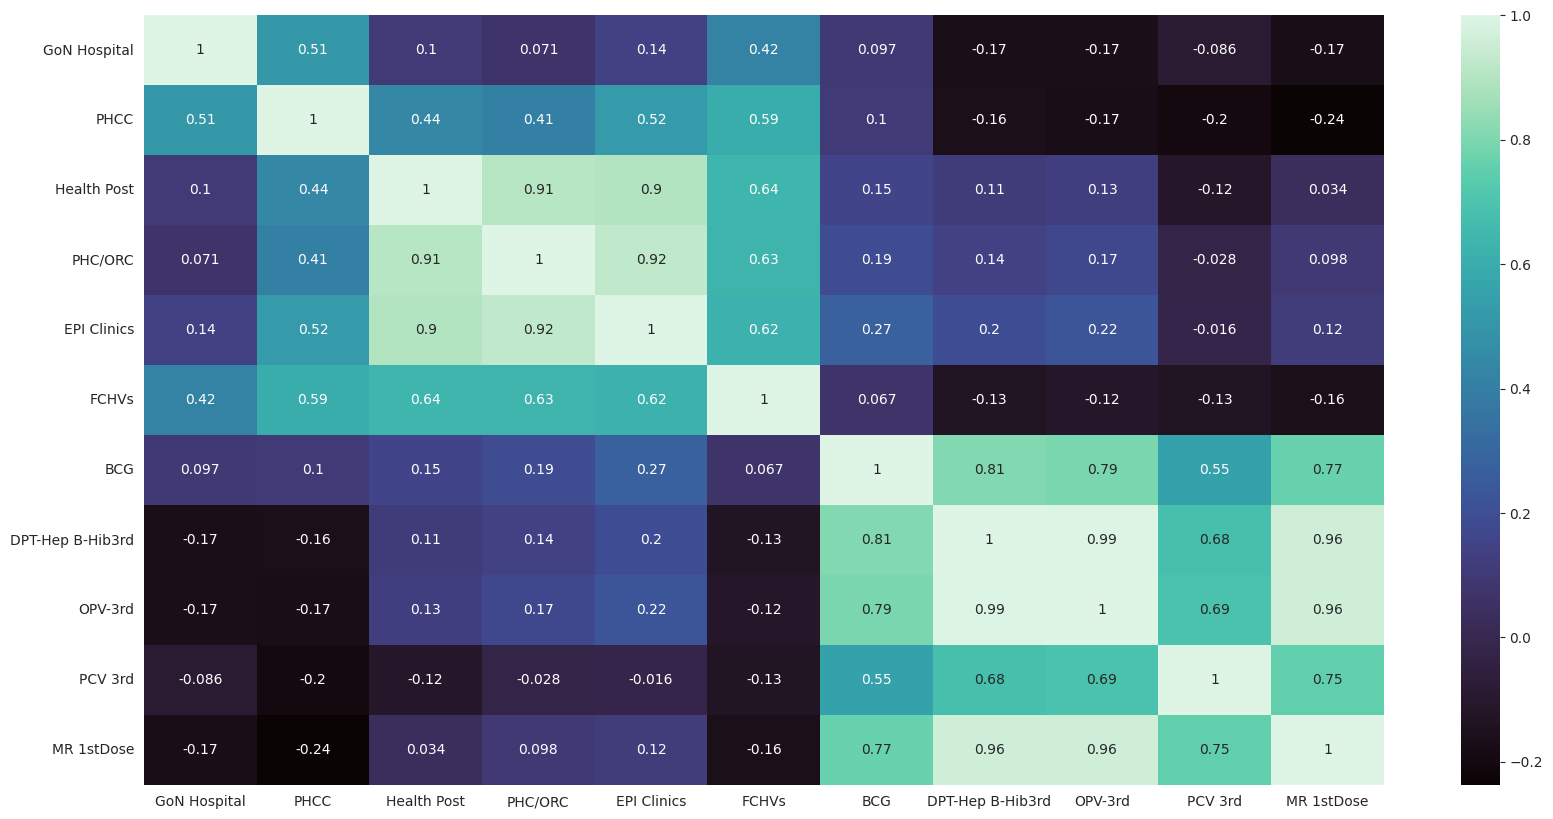

In [205]:
plt.figure(figsize=(20,10))
num_df=df.select_dtypes(include='number')
sns.heatmap(num_df.corr(), cmap='mako', annot=True)

# Creating different plots:

# Barplot:

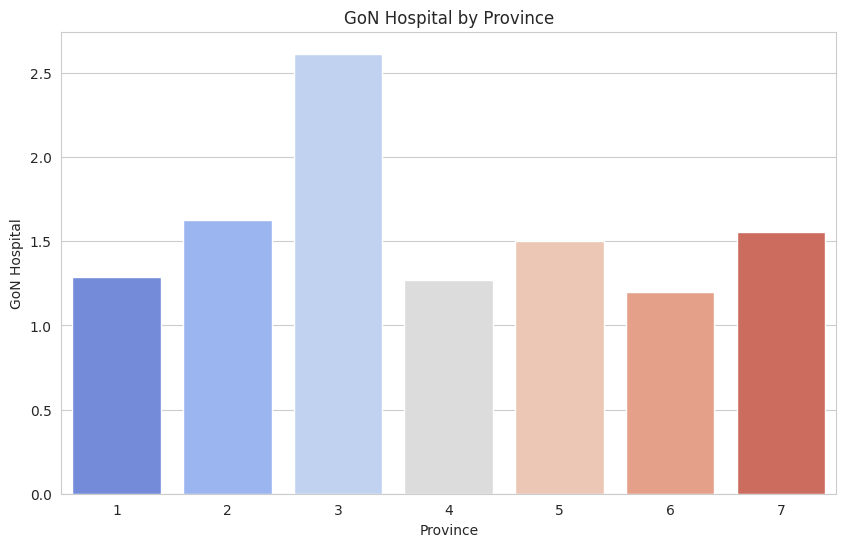

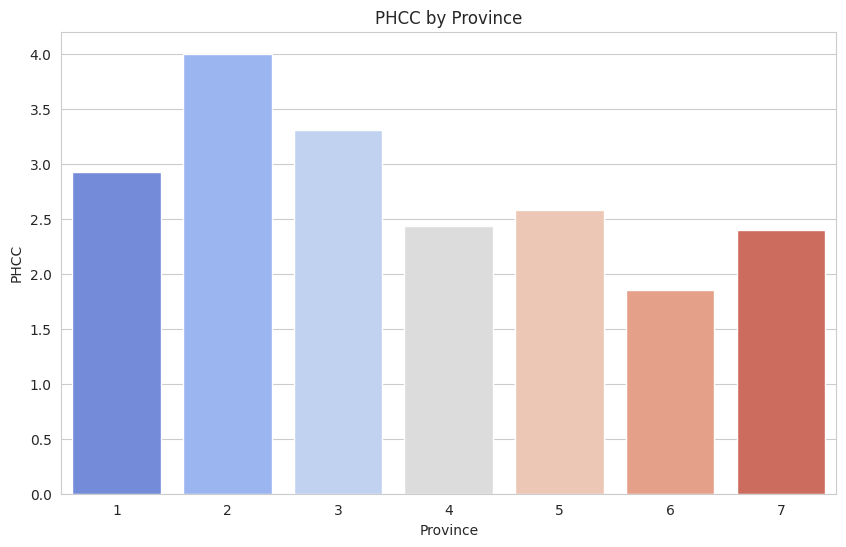

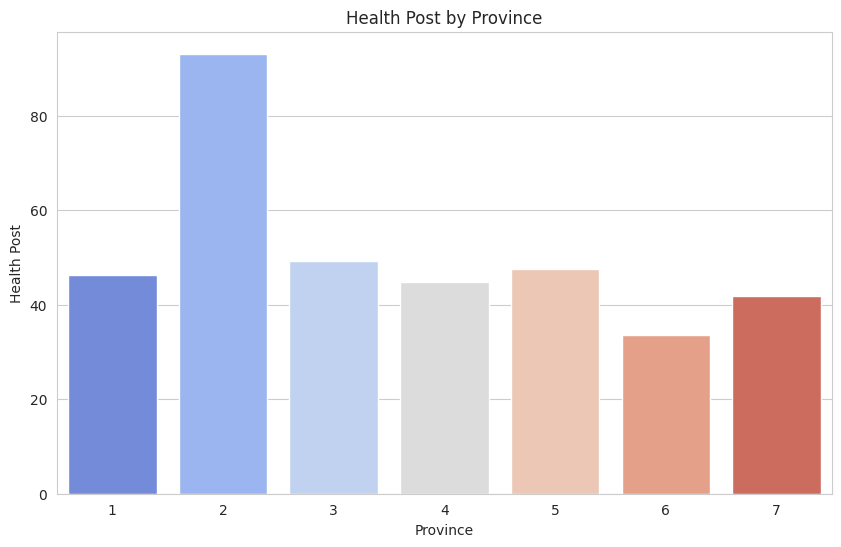

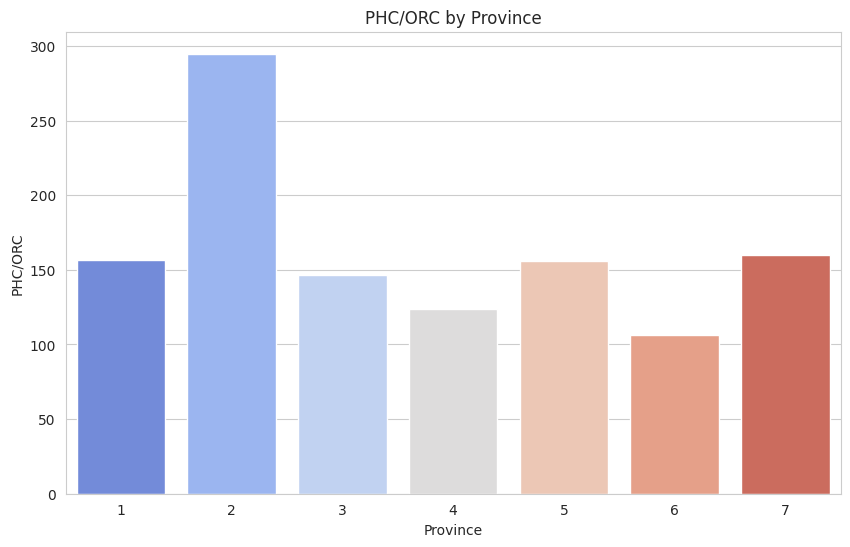

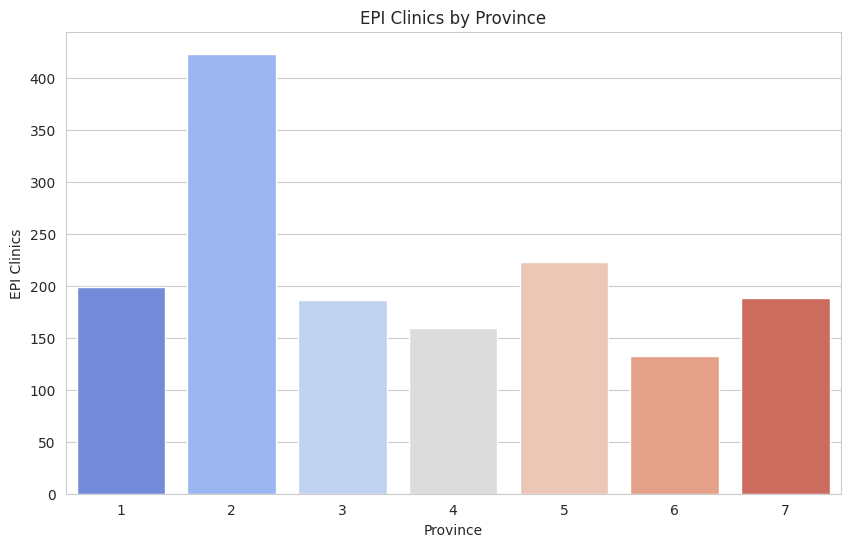

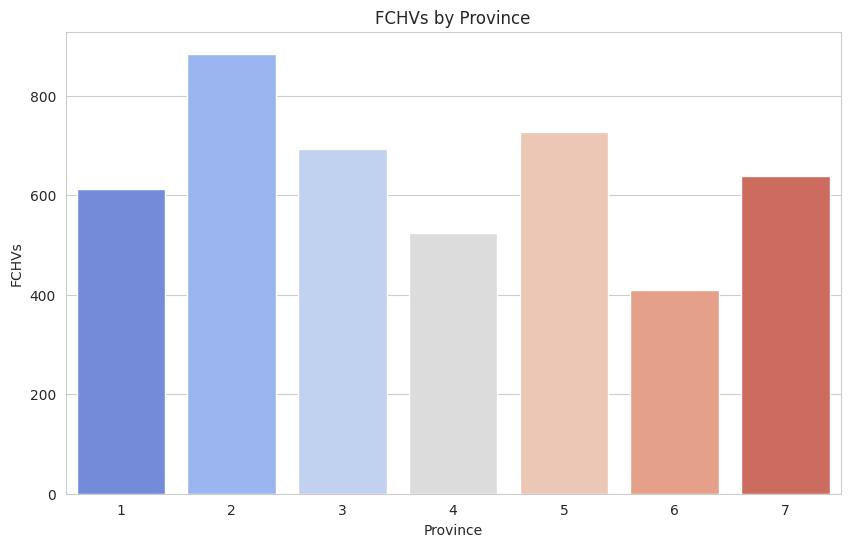

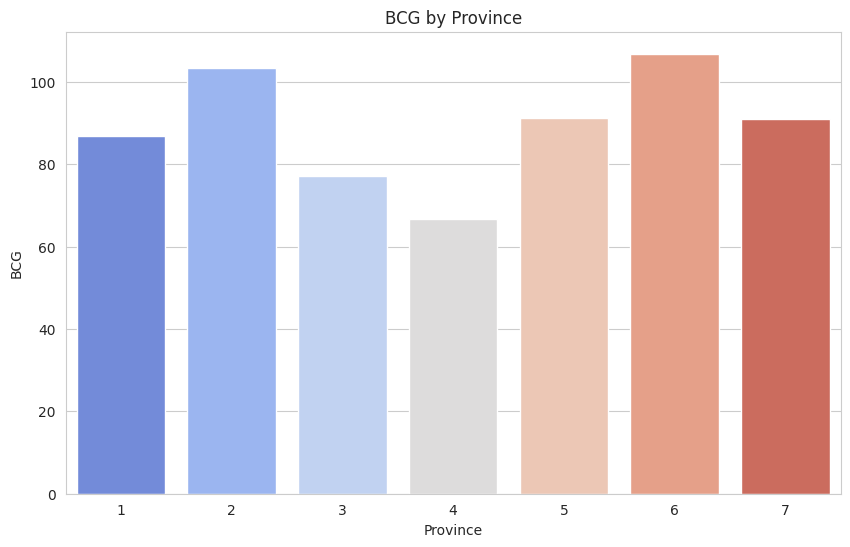

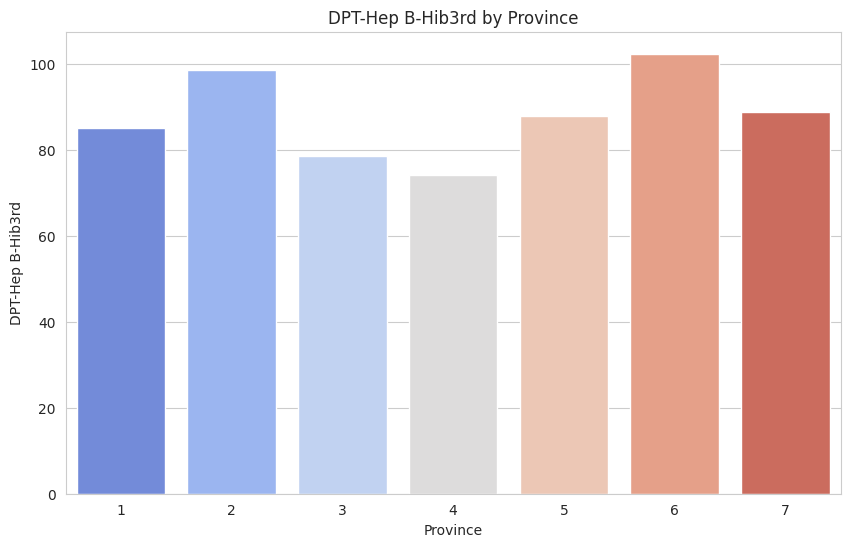

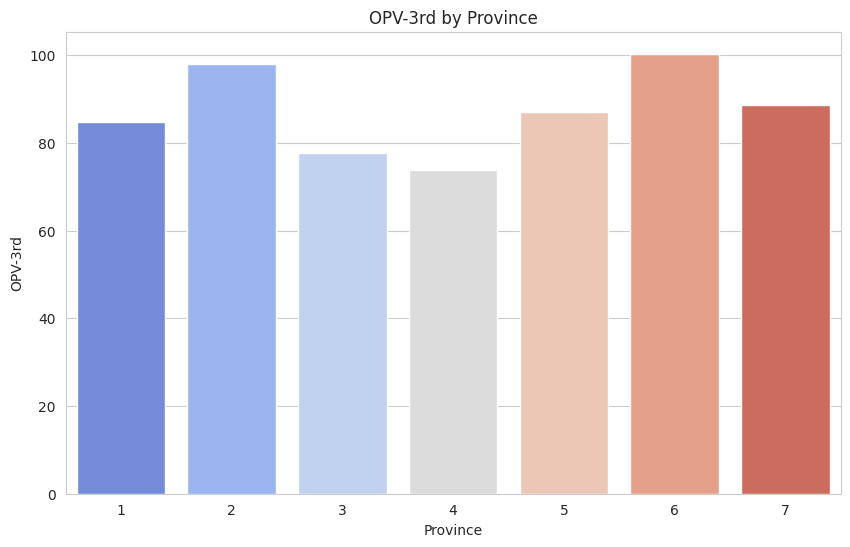

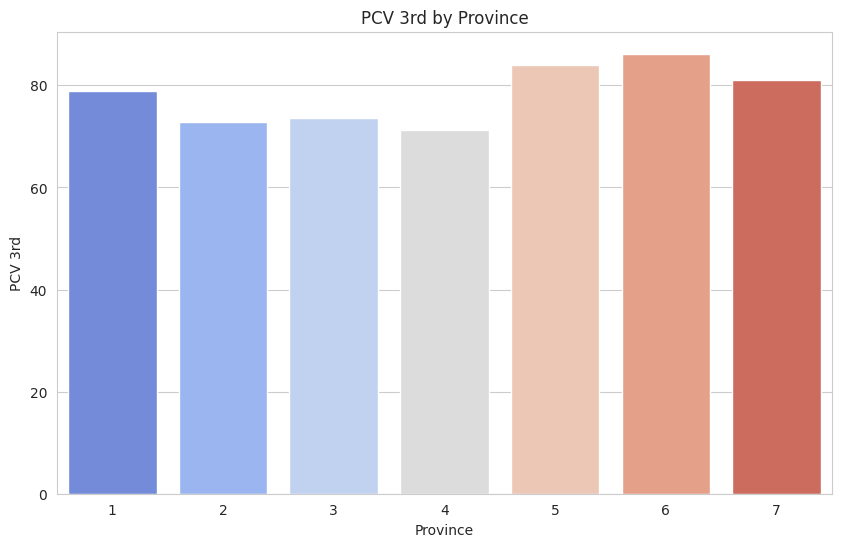

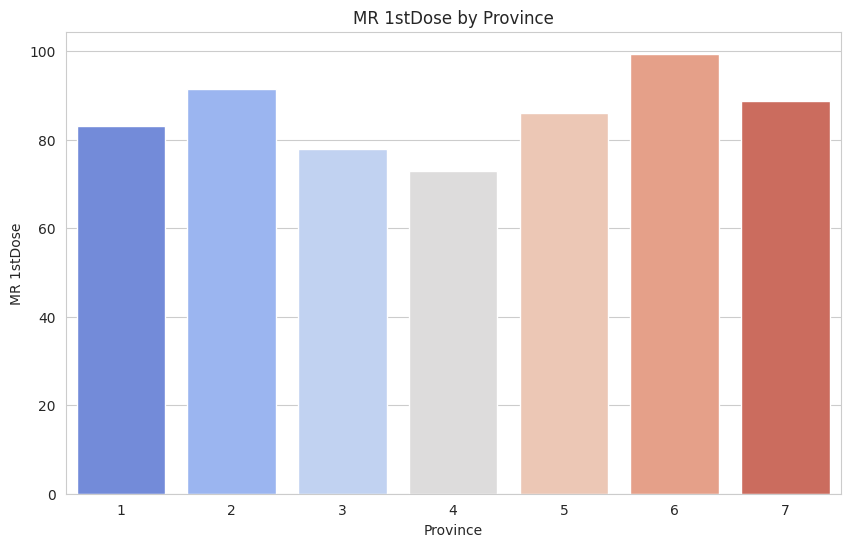

In [206]:
# Create a list of features to plot
features = ['GoN Hospital', 'PHCC', 'Health Post', 'PHC/ORC', 'EPI Clinics', 'FCHVs',
            'BCG', 'DPT-Hep B-Hib3rd', 'OPV-3rd', 'PCV 3rd', 'MR 1stDose']

# Set the width of each bar
barWidth = 0.15


# Loop over each feature and create a barplot
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Provinces', y=feature, data=df, palette='coolwarm', errorbar=None)
    plt.title(f'{feature} by Province')
    plt.xlabel('Province')
    plt.ylabel(feature)
    plt.show()

# Boxplot:

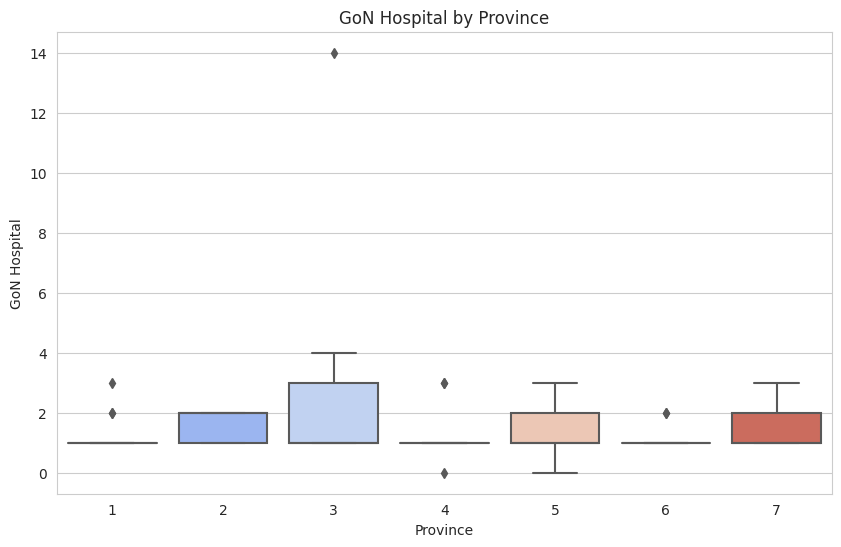

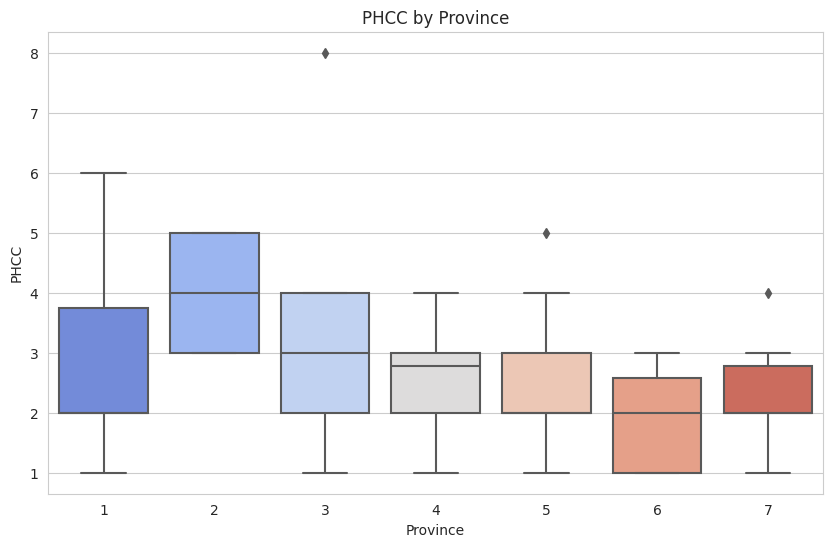

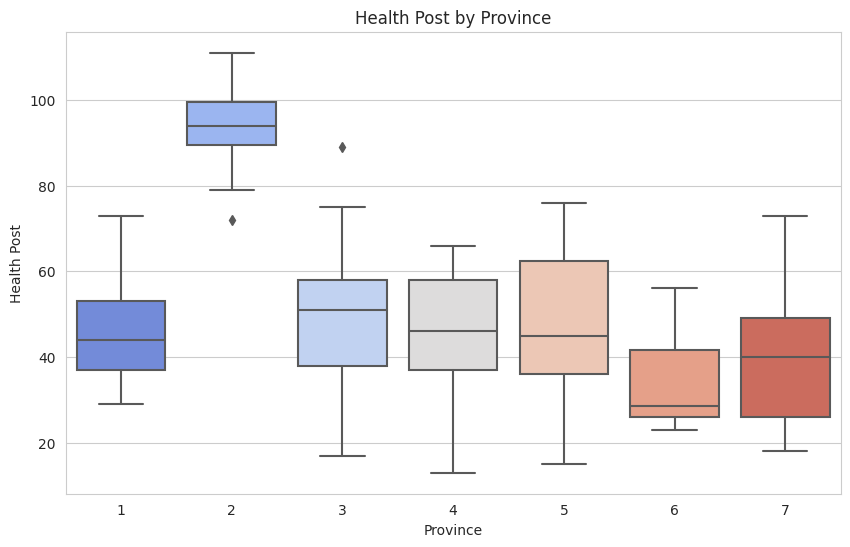

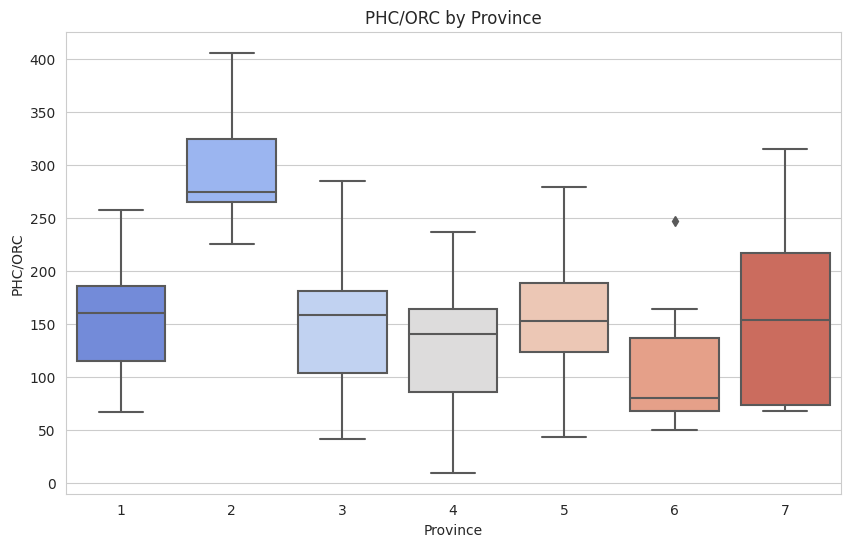

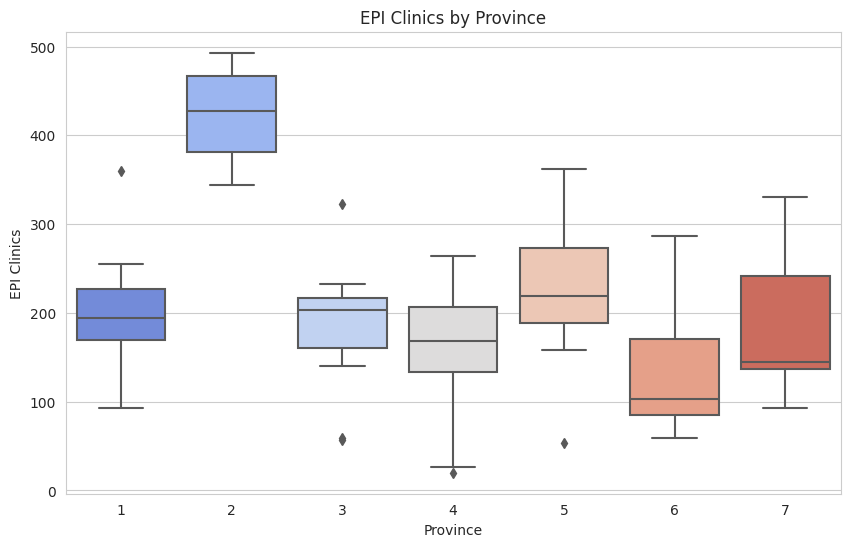

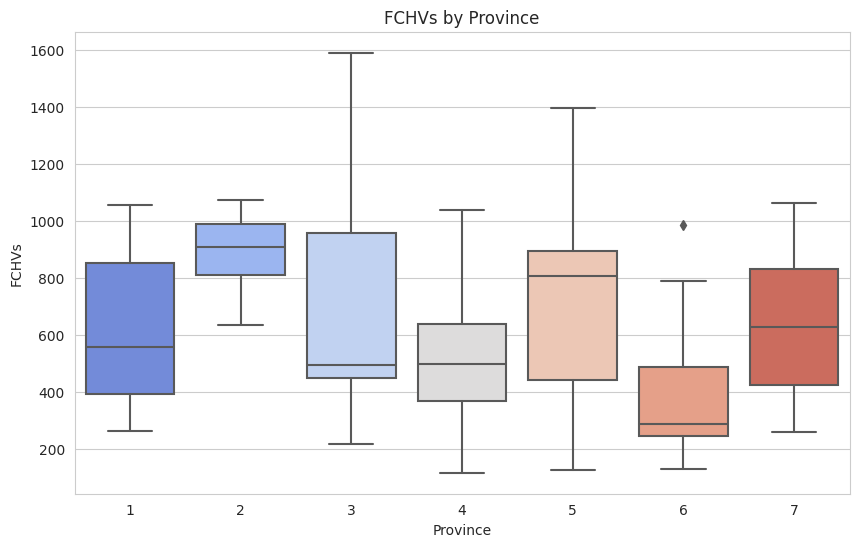

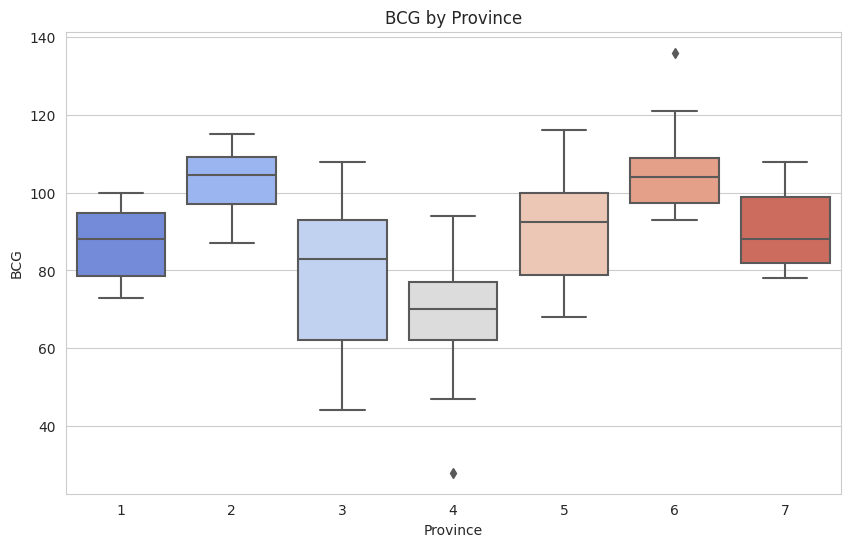

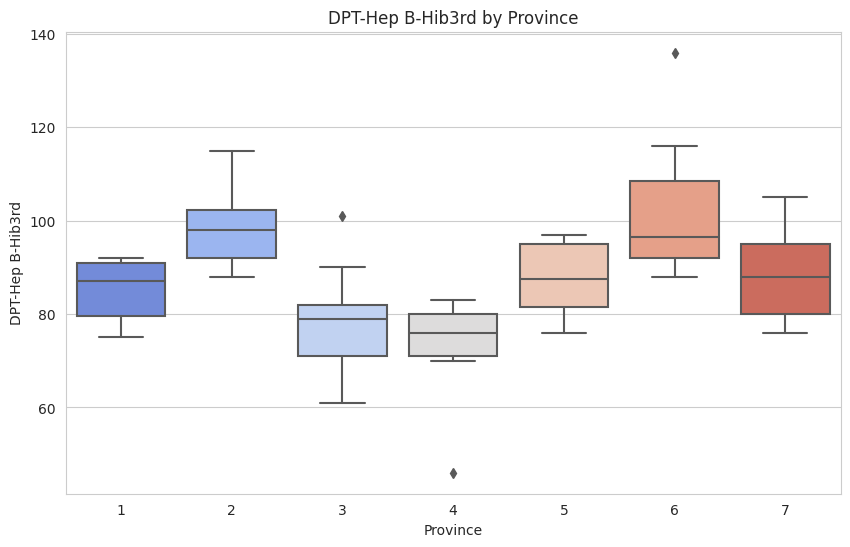

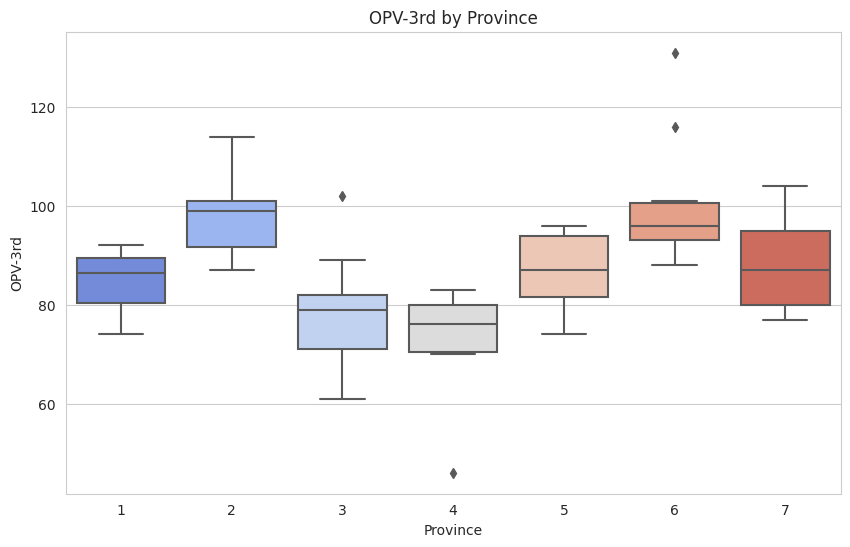

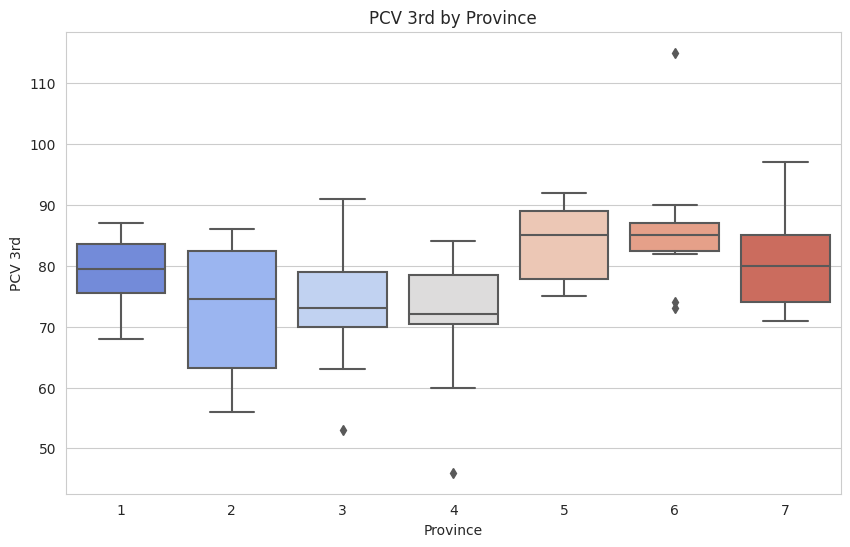

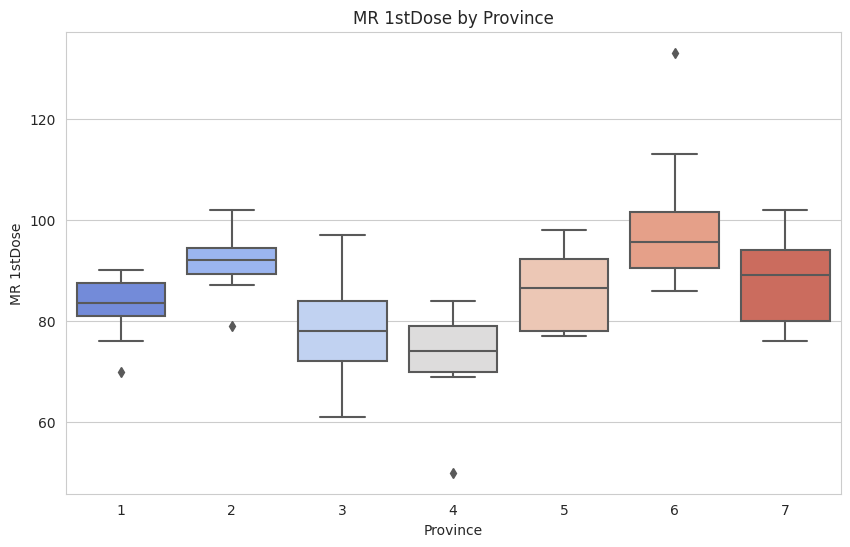

In [207]:

sns.set_style('whitegrid')

# Loop over each feature and create a boxplot
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Provinces', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} by Province')
    plt.xlabel('Province')
    plt.ylabel(feature)
    plt.show()

# Scatterplot:

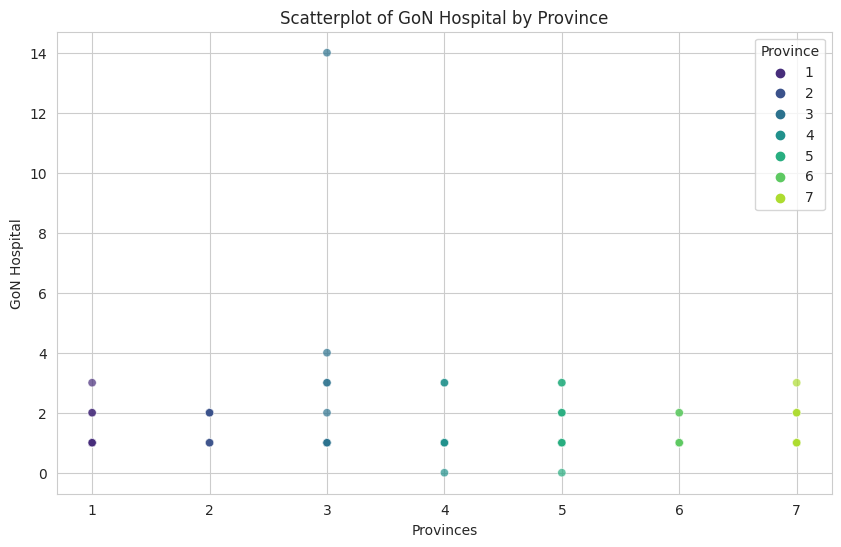

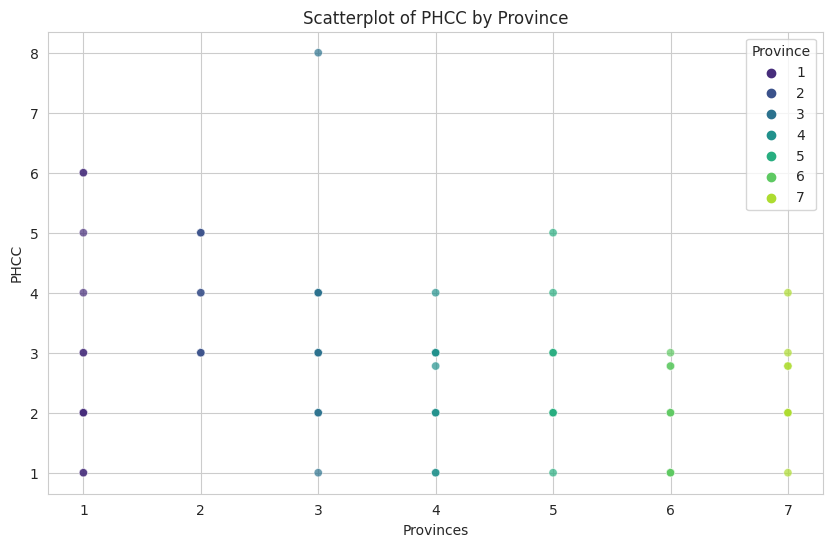

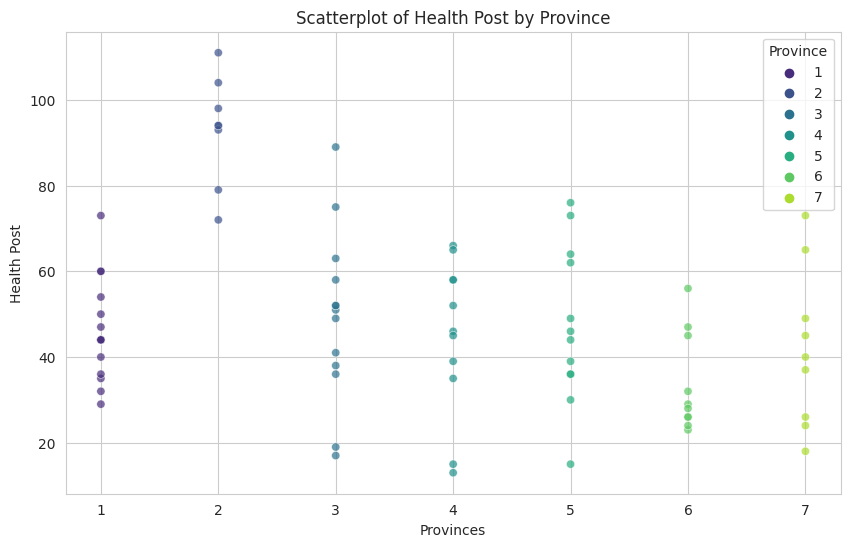

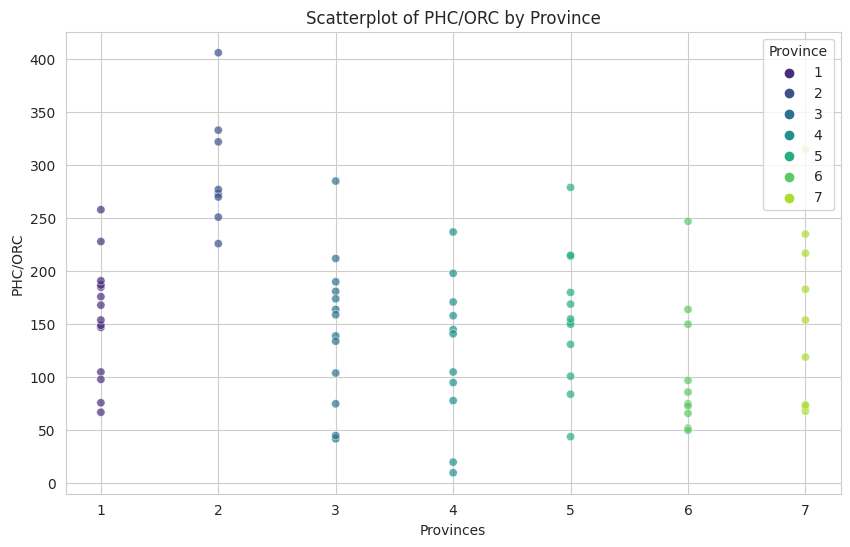

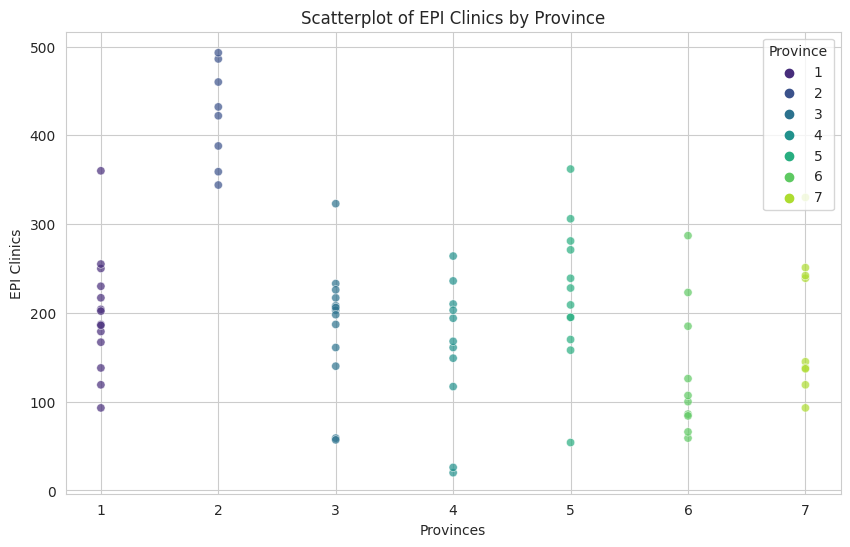

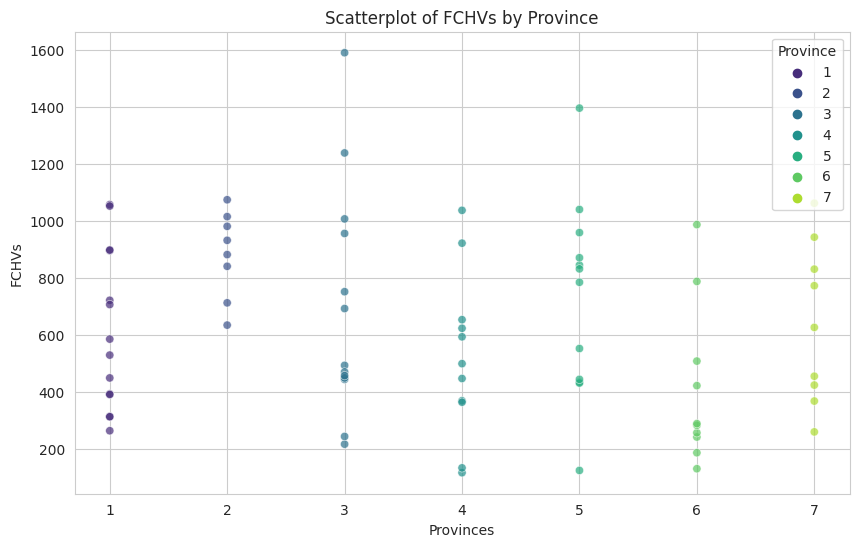

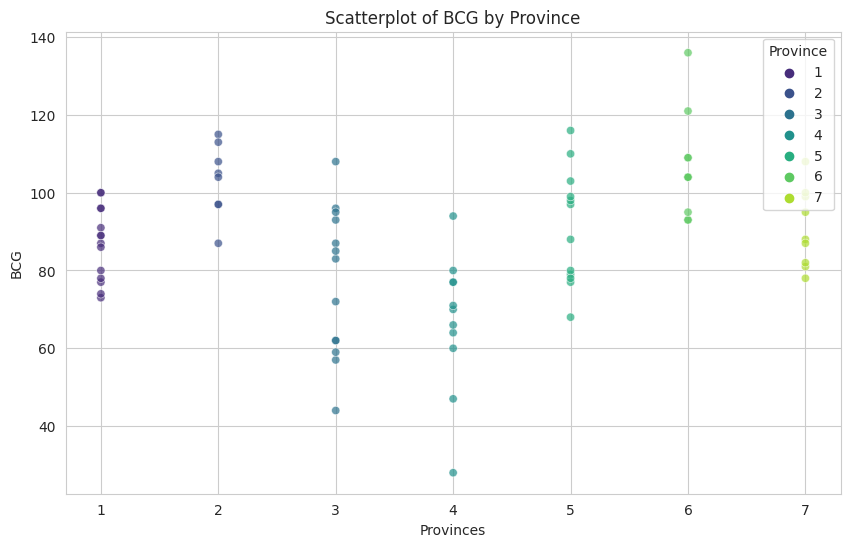

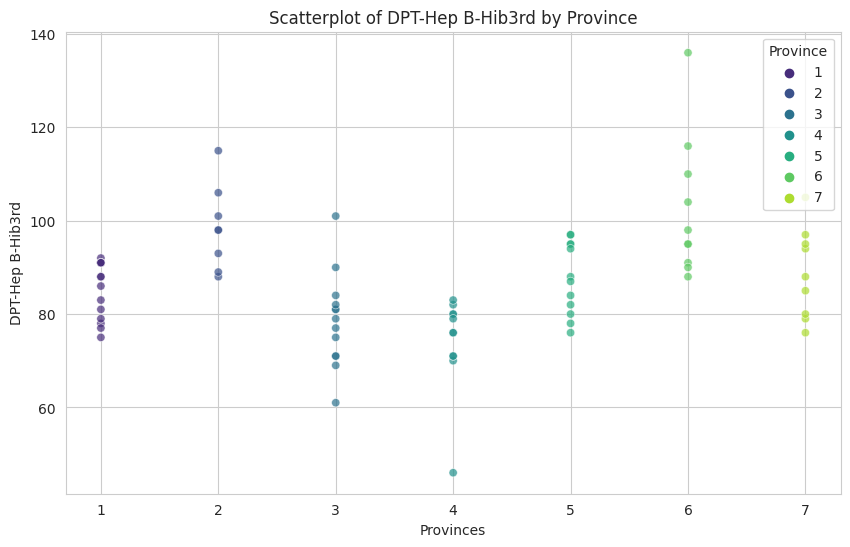

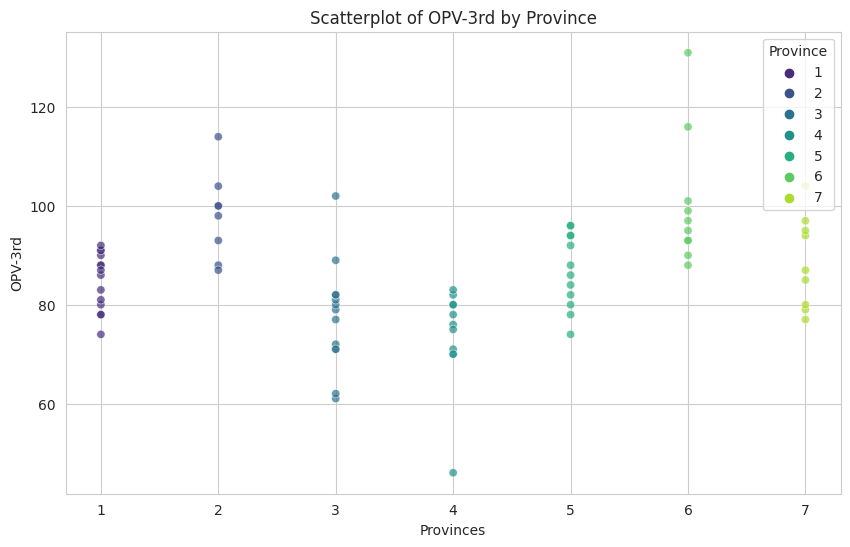

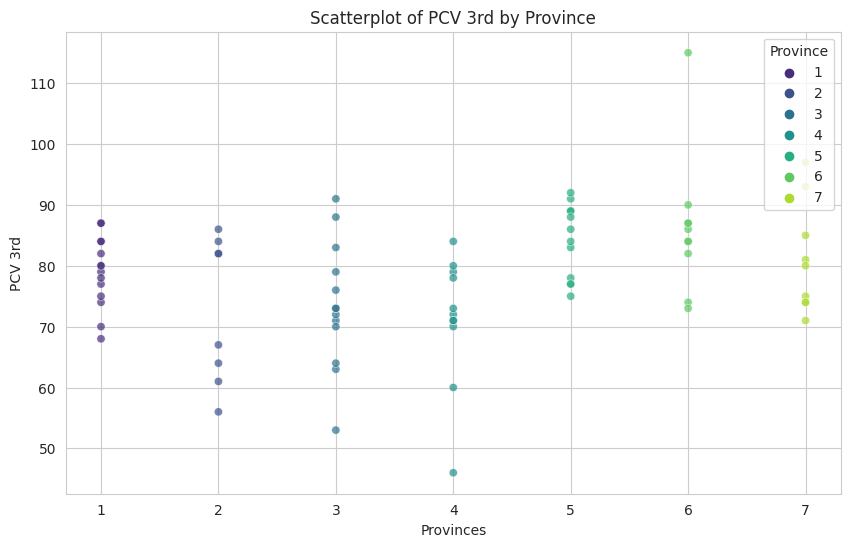

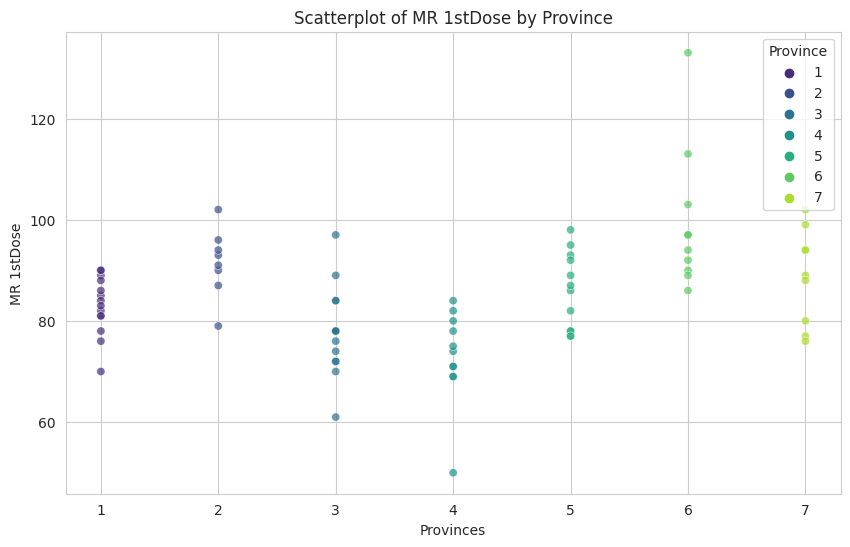

In [208]:
# Loop over each feature and create a scatterplot with shades
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Provinces', y=feature, hue='Provinces', palette='viridis', alpha=0.7)
    plt.title(f'Scatterplot of {feature} by Province')
    plt.xlabel('Provinces')
    plt.ylabel(feature)
    plt.legend(title='Province', loc='upper right')
    plt.show()

# Checking for Outliers

In [25]:
# Calculate descriptive statistics
mean = df['GoN Hospital'].mean()
median = df['GoN Hospital'].median()
std_dev = df['GoN Hospital'].std()
Q1 = df['GoN Hospital'].quantile(0.25)
Q3 = df['GoN Hospital'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['GoN Hospital'] < lower_bound) | (df['GoN Hospital'] > upper_bound)]

# Print the descriptive statistics
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Print the potential outliers
print("Potential Outliers:")
print(outliers)

Mean: 1.5974025974025974
Median: 1.0
Standard Deviation: 1.6243196167508371
Q1: 1.0
Q3: 2.0
IQR: 1.0
Potential Outliers:
   District Name  GoN Hospital  PHCC  Health Post  PHC/ORC  EPI Clinics   
29  27 kathmandu            14   8.0           58      134          217  \
34   35 chitawan             4   3.0           36      104          198   

    FCHVs   BCG  DPT-Hep B-Hib3rd  OPV-3rd  PCV 3rd  MR 1stDose  Provinces  
29   1589  96.0                71     71.0       70          72          3  
34    458  95.0                82     82.0       79          78          3  


# Creating sample class to visualize in detail

In [209]:
#sample class creation of Province 3
df_P3=df[df['Provinces']== 3]


In [42]:
df_P3

District Name  GoN Hospital  PHCC  Health Post  PHC/ORC  EPI Clinics   
14    15 saptari             2   4.0          111      406          460  \
15     16 siraha             2   4.0          104      251          432   
16    17 dhanusa             1   5.0           98      322          486   
17  18 mahottari             2   3.0           72      273          359   
18    19 sarlahi             1   5.0           94      226          344   
19   32 rautahat             2   3.0           93      333          422   
20       33 bara             1   5.0           94      277          493   
21      34 parsa             2   3.0           79      270          388   

    FCHVs    BCG  DPT-Hep B-Hib3rd  OPV-3rd  PCV 3rd  MR 1stDose  Provinces  
14   1074   87.0                88     88.0       82          87          2  
15    981  115.0               106    104.0       84          96          2  
16    882  113.0               115    114.0       86         102          2  
17    635  105.0               101    100.0       61          93          2  
18   1015   97.0                89     87.0       56          79          2  
19    841  108.0                98    100.0       64          90          2  
20    932   97.0                98     98.0       67          94          2  
21    713  104.0                93     93.0       82          91          2

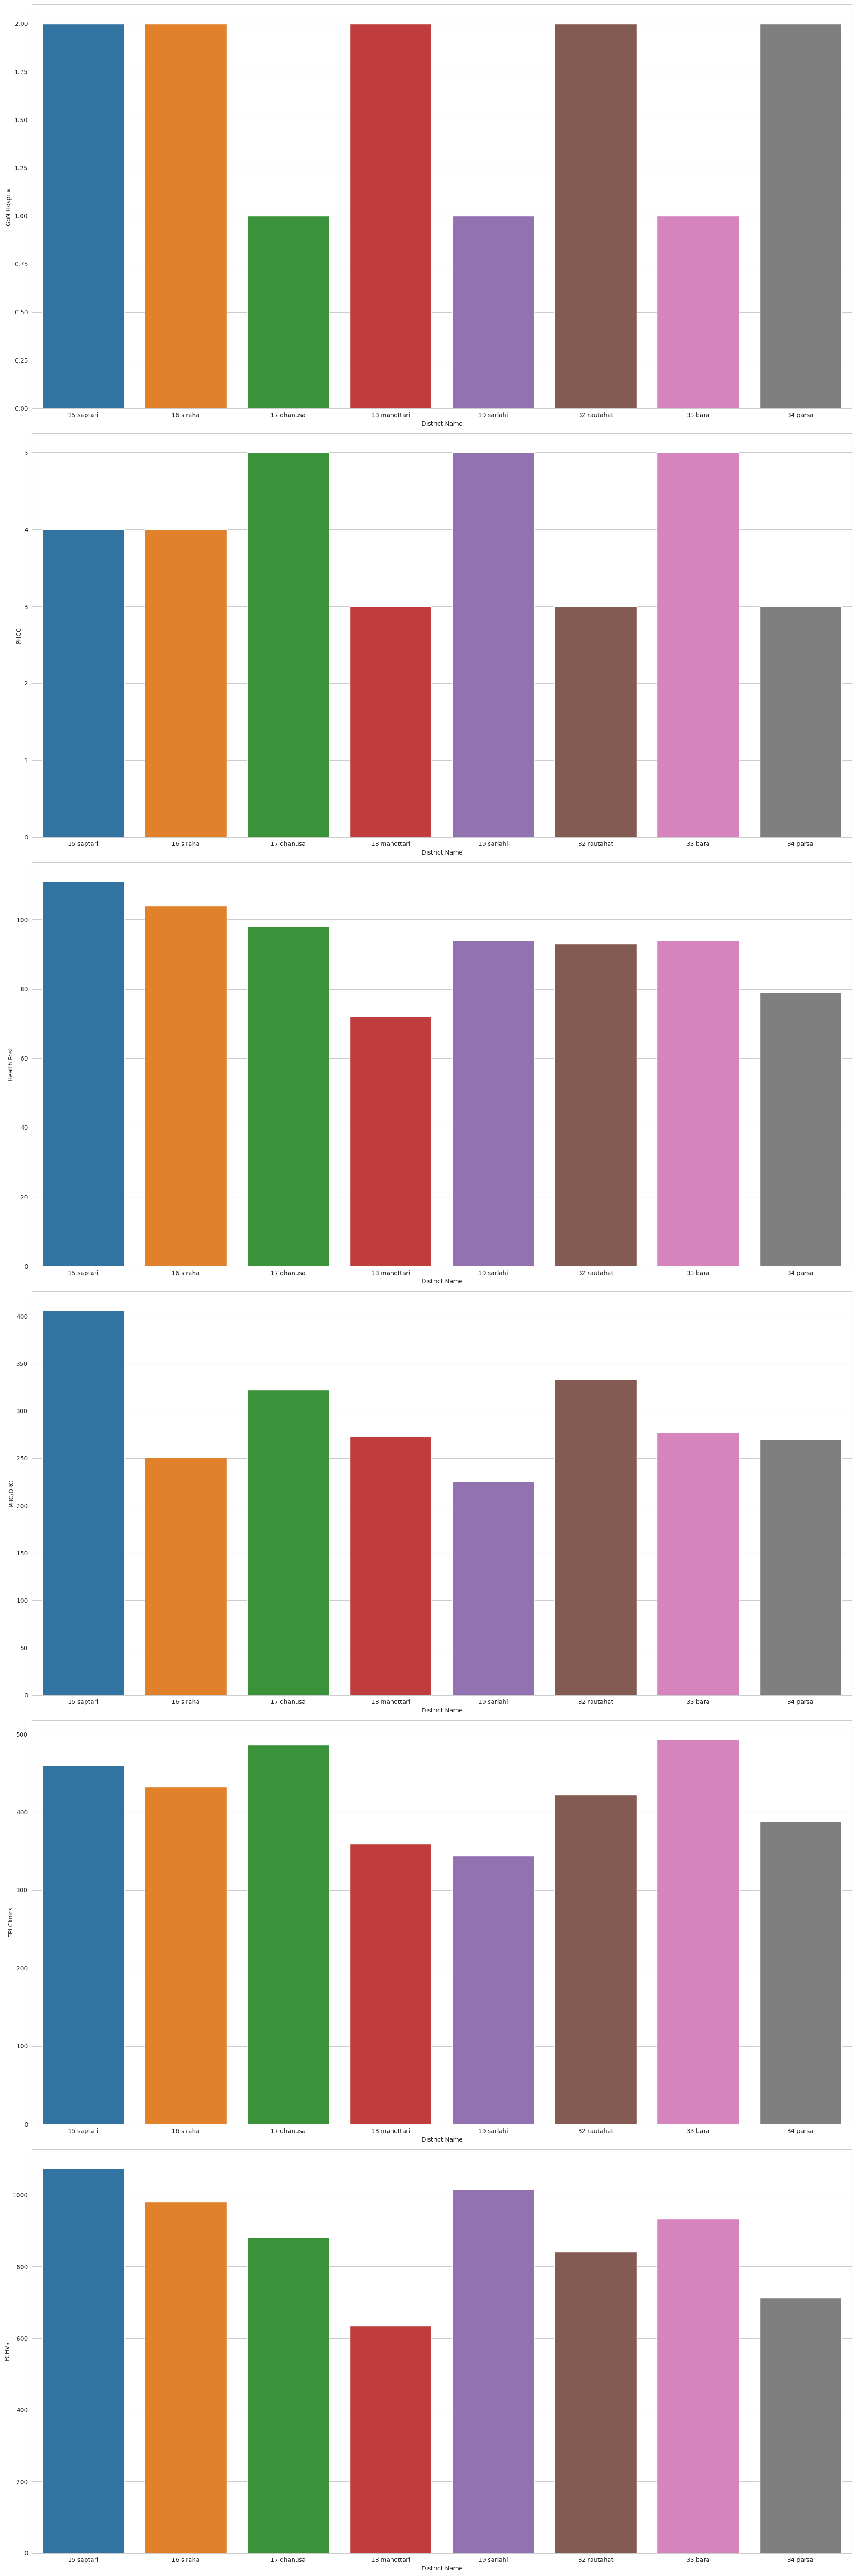

In [44]:
#Plotting only Health Institutes and Programmes

# Define the features to plot
features = ['GoN Hospital', 'PHCC', 'Health Post', 'PHC/ORC', 'EPI Clinics', 'FCHVs']

# Set up the figure and axes
fig, axes = plt.subplots(len(features), 1, figsize=(20, 10 * len(features)))

# Iterate over the features and create barplots
for i, feature in enumerate(features):
    ax = axes[i]  # Get the current axis
    sns.barplot(data=df_P3, x='District Name', y=feature, ax=ax)
    ax.set_ylabel(feature)  # Set the y-label as the feature name

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()




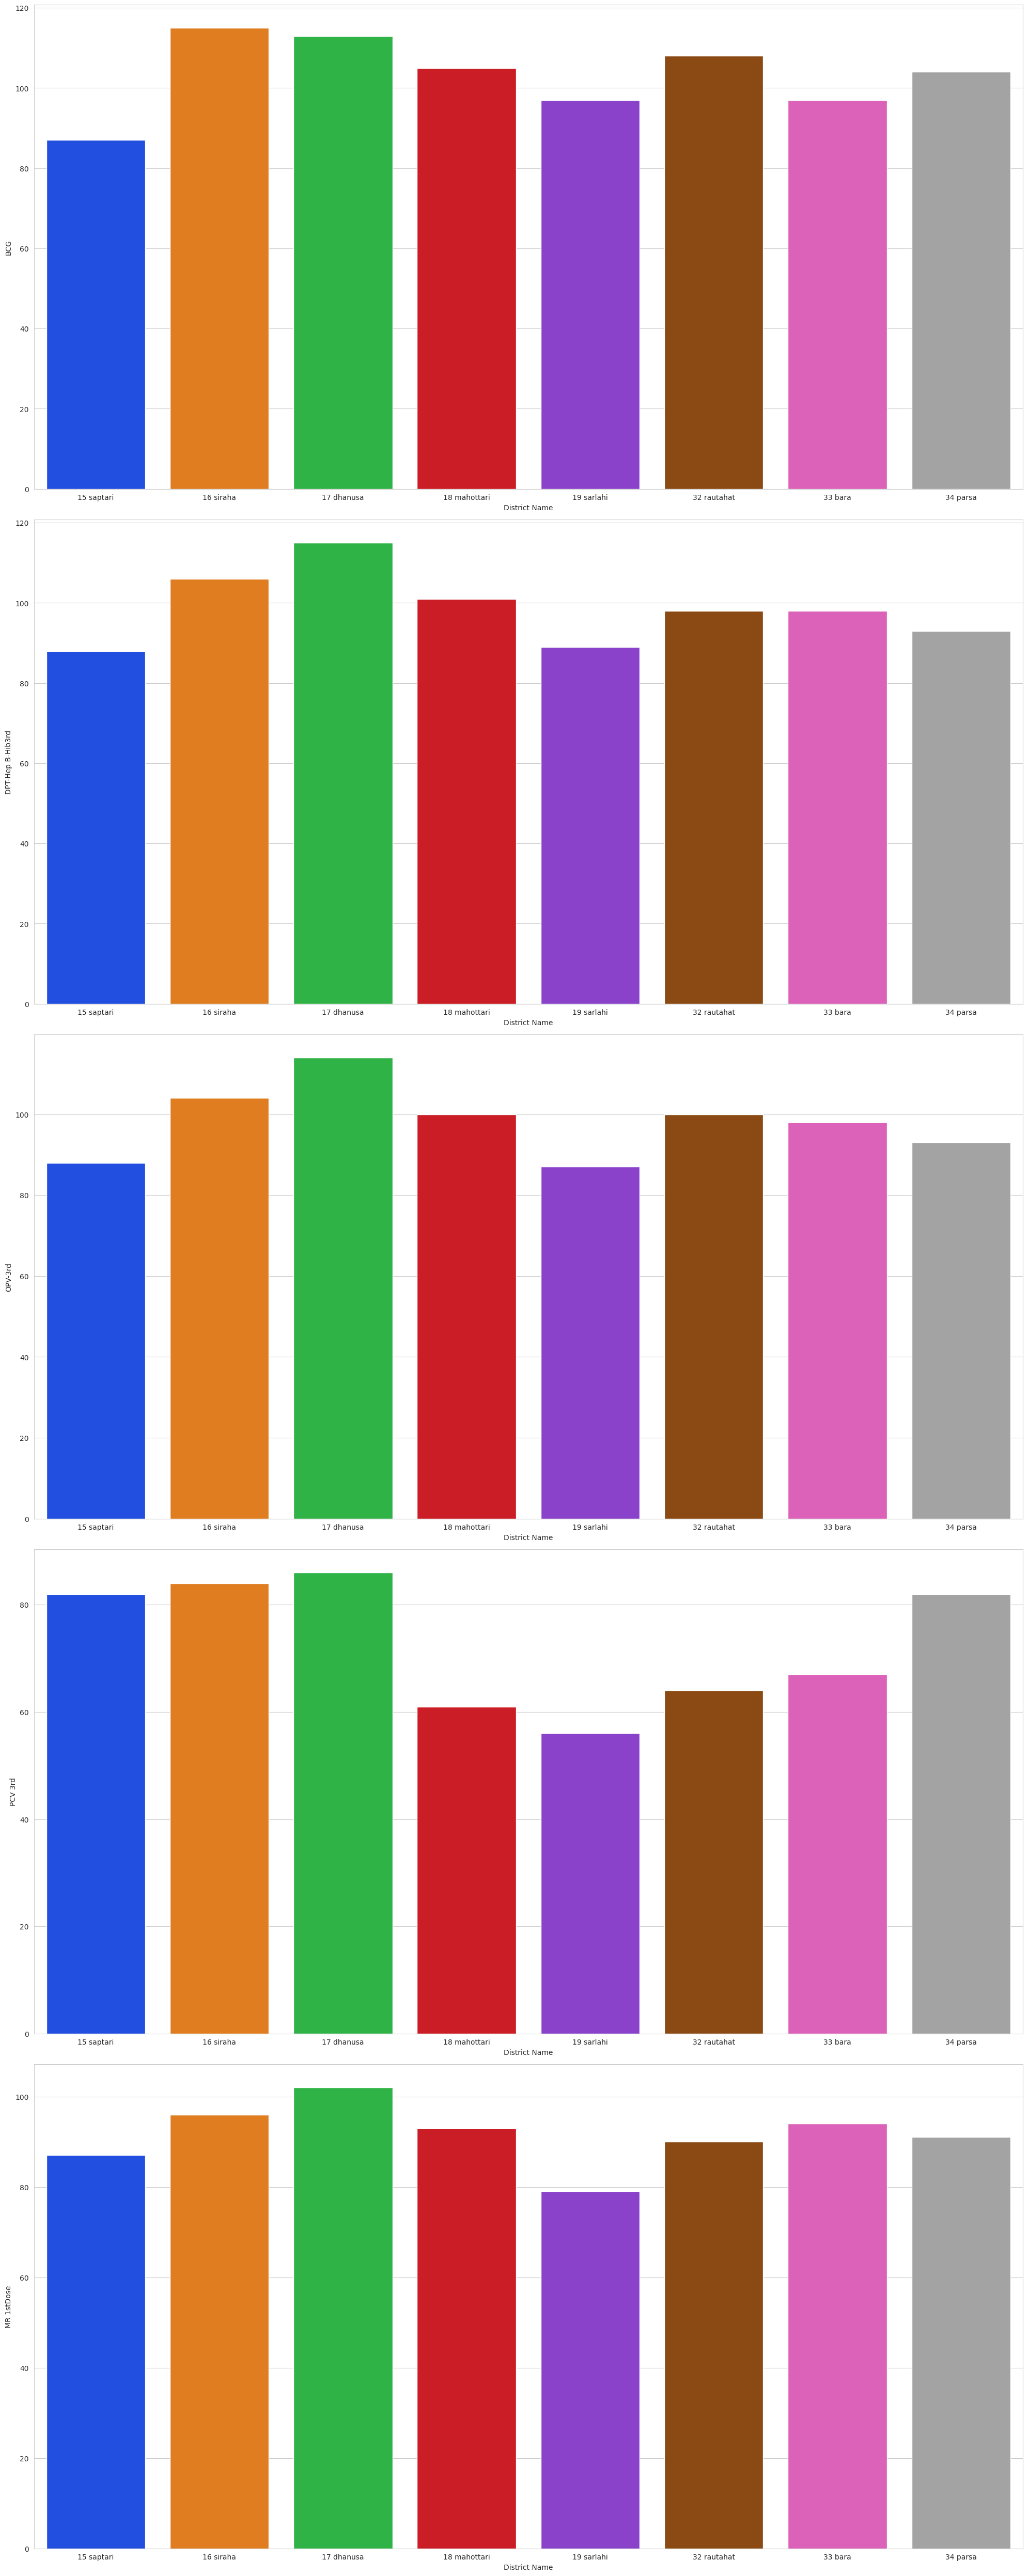

In [45]:
#Plotting only Vaccination Programmes

# Define the features to plot
features = ['BCG', 'DPT-Hep B-Hib3rd', 'OPV-3rd', 'PCV 3rd', 'MR 1stDose']

# Set up the figure and axes
fig, axes = plt.subplots(len(features), 1, figsize=(20, 10 * len(features)))

# Iterate over the features and create barplots
for i, feature in enumerate(features):
    ax = axes[i]  # Get the current axis
    sns.barplot(data=df_P3, x='District Name', y=feature, ax=ax, palette='bright')
    ax.set_ylabel(feature)  # Set the y-label as the feature name

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

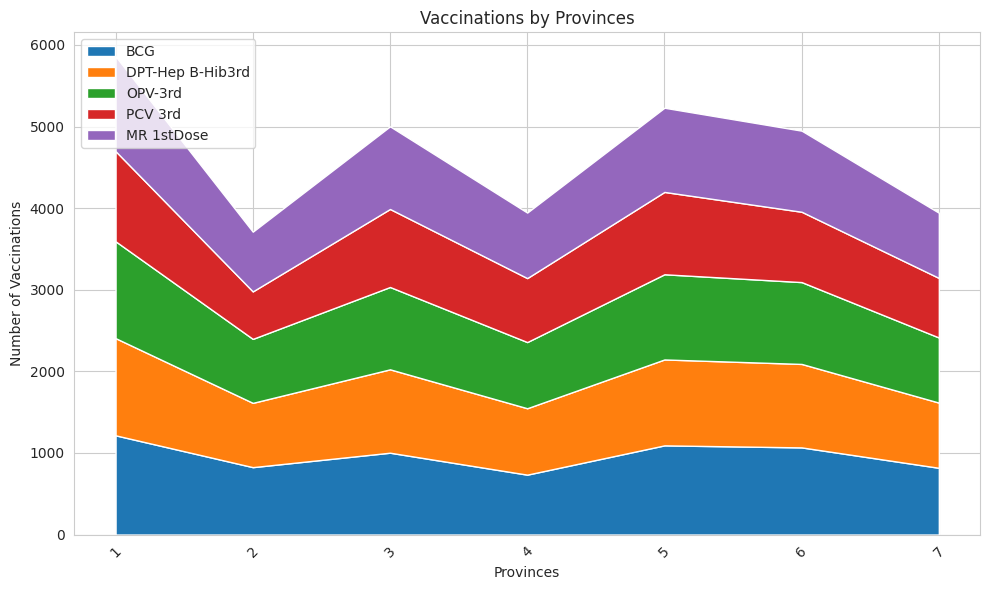

In [46]:
# Group the data by the features
features = ['BCG', 'DPT-Hep B-Hib3rd', 'OPV-3rd', 'PCV 3rd', 'MR 1stDose']
grouped_data = df.groupby('Provinces')[features].sum()

# Create a stack plot
plt.figure(figsize=(10, 6))
plt.stackplot(grouped_data.index, grouped_data.values.T, labels=features)
plt.xlabel('Provinces')
plt.ylabel('Number of Vaccinations')
plt.title('Vaccinations by Provinces')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

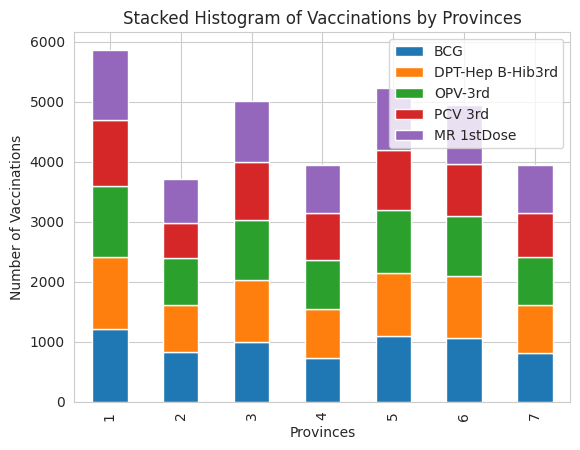

In [40]:


# Create the stacked histogram plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Provinces')
plt.ylabel('Number of Vaccinations')
plt.title('Stacked Histogram of Vaccinations by Provinces')
plt.legend(loc='upper right')

# Display the plot
plt.show()


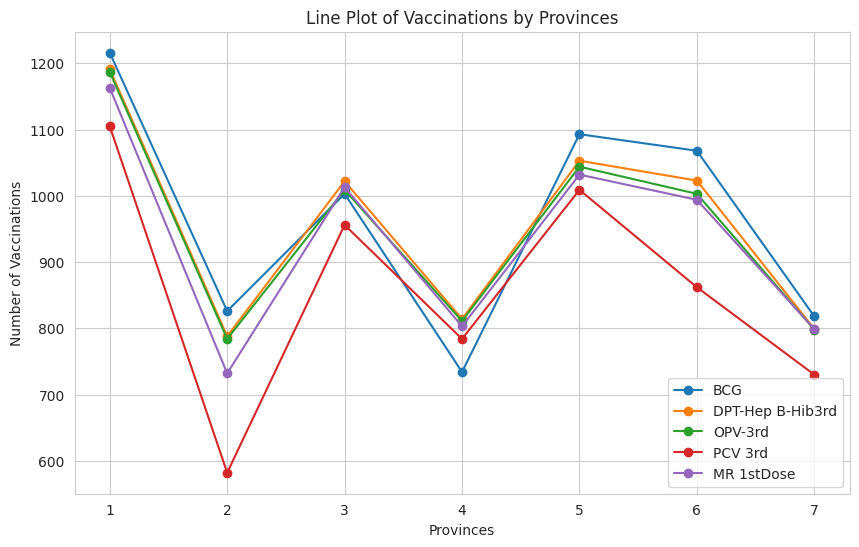

In [117]:

# Create the line plot
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(grouped_data.index, grouped_data[feature], marker='o', label=feature)

plt.xlabel('Provinces')
plt.ylabel('Number of Vaccinations')
plt.title('Line Plot of Vaccinations by Provinces')
plt.legend()

# Display the plot
plt.show()

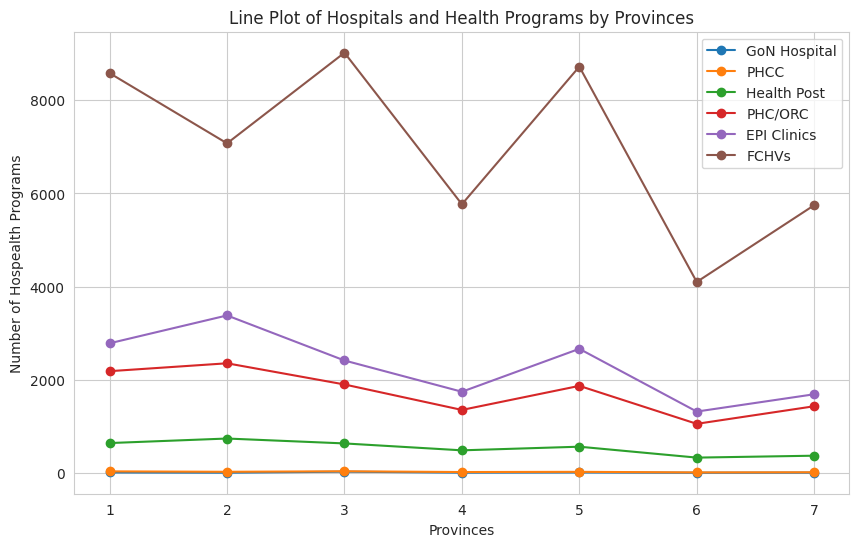

In [155]:
features = ['GoN Hospital', 'PHCC', 'Health Post', 'PHC/ORC', 'EPI Clinics', 'FCHVs']

grouped_data = df.groupby('Provinces')[features].sum()



# Create the line plot
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(grouped_data.index, grouped_data[feature], marker='o', label=feature)

plt.xlabel('Provinces')
plt.ylabel('Number of Hospealth Programs')
plt.title('Line Plot of Hospitals and Health Programs by Provinces')
plt.legend()

# Display the plot
plt.show()

# Visualizing the dataset using Maps (Geopandas)

# Visualizing distribution throughout the provinces

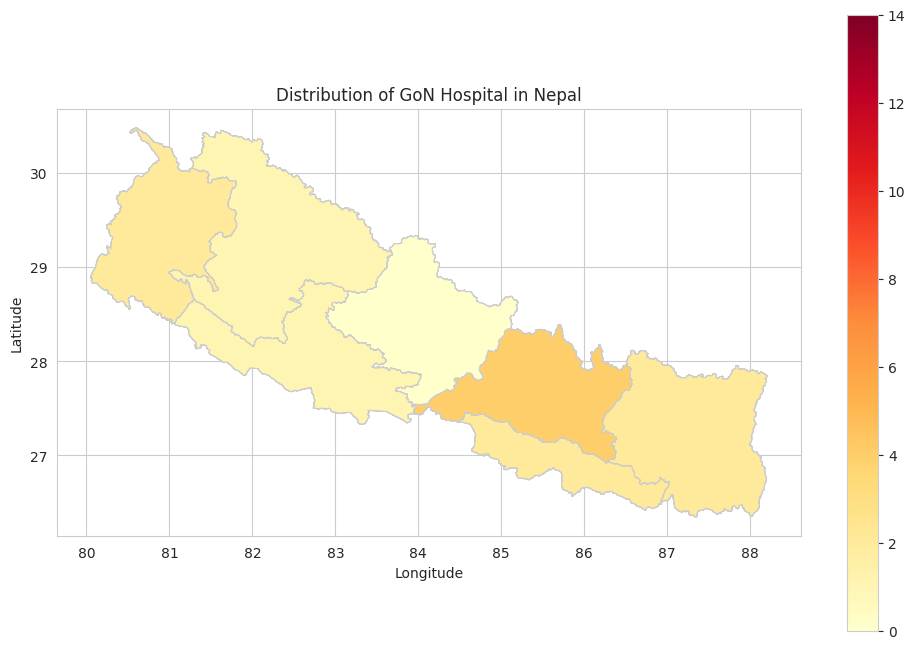

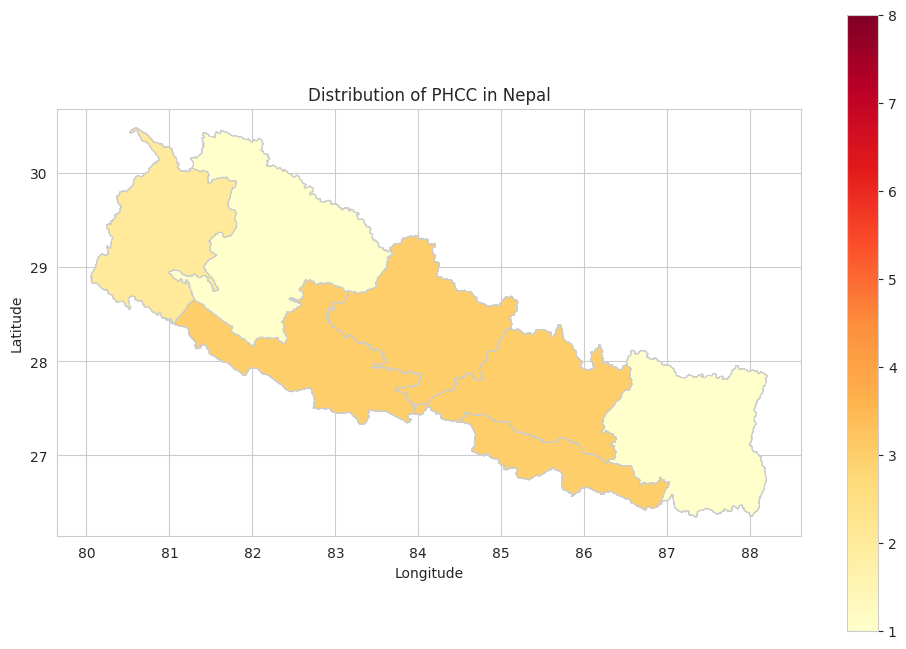

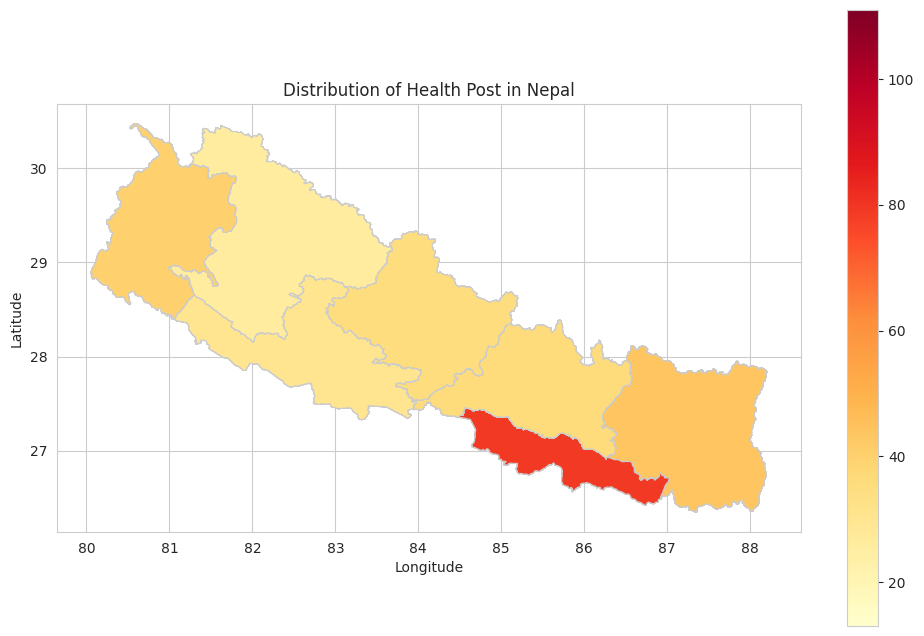

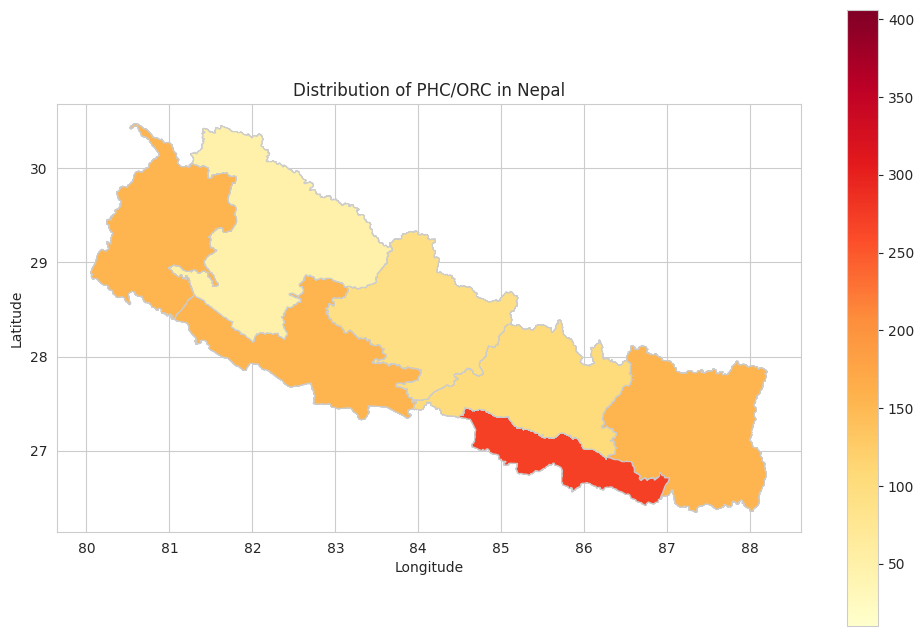

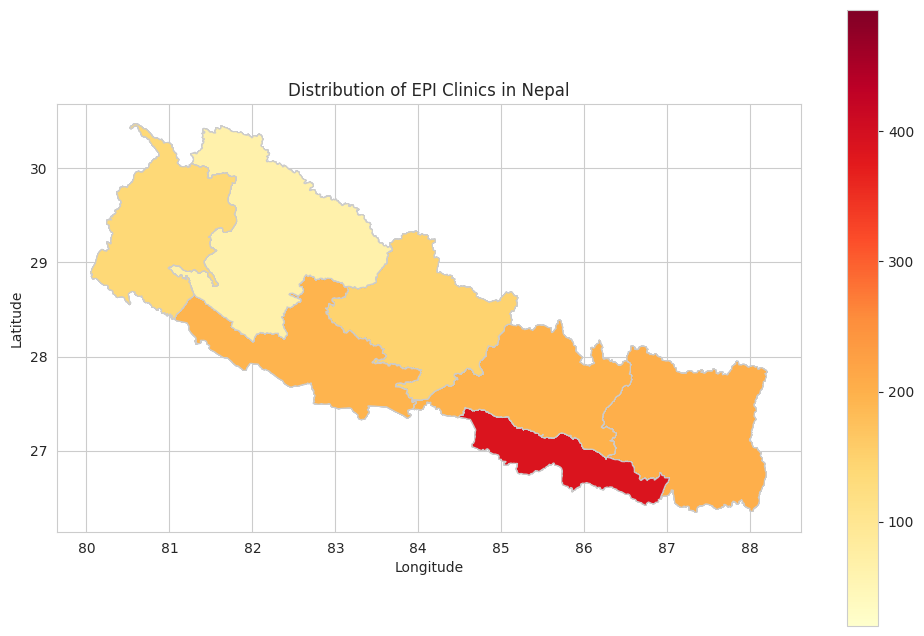

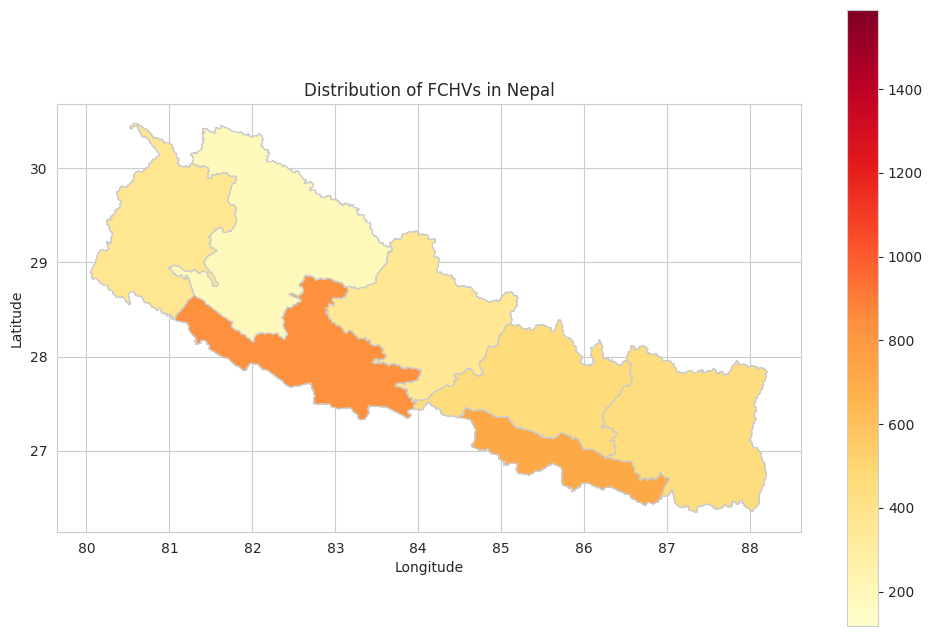

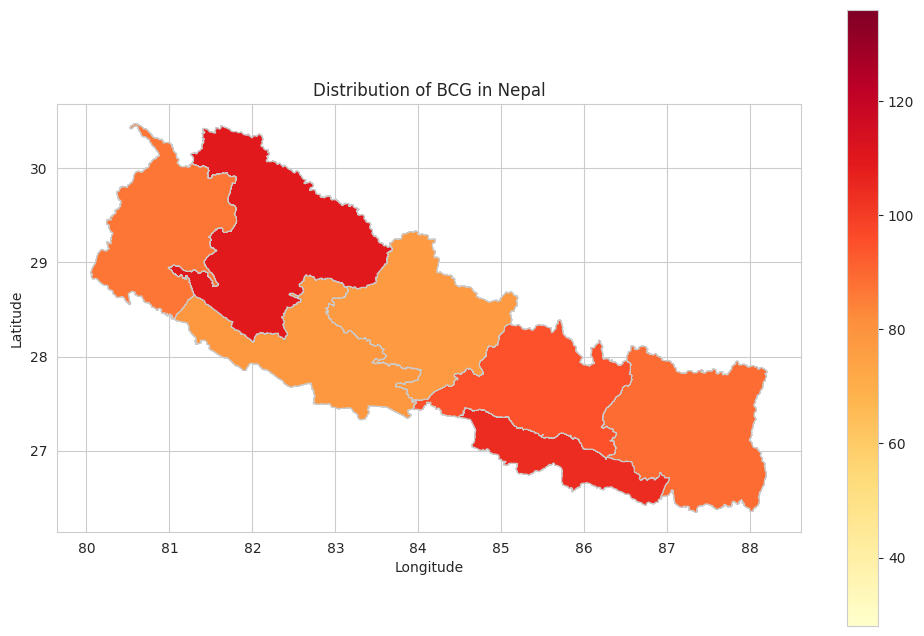

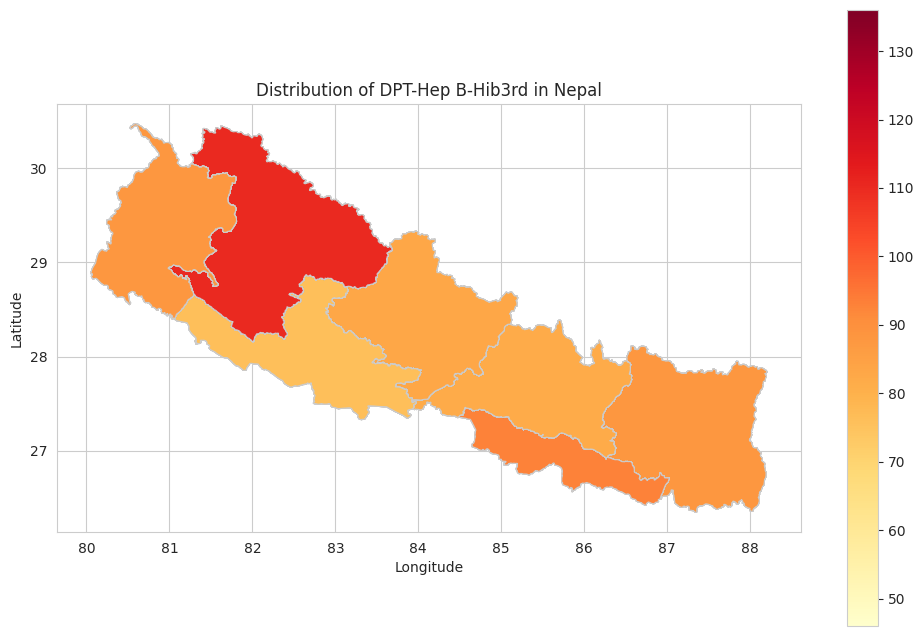

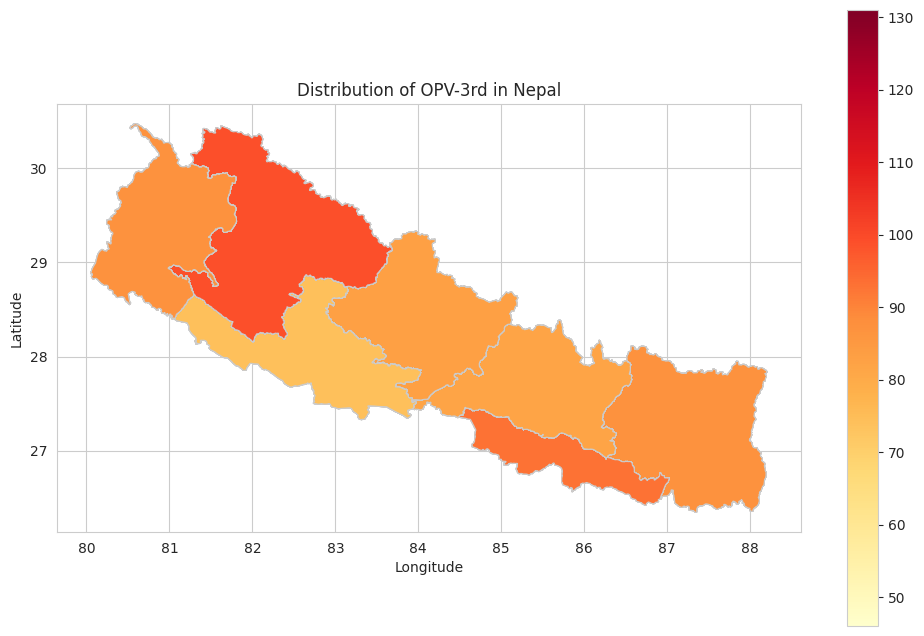

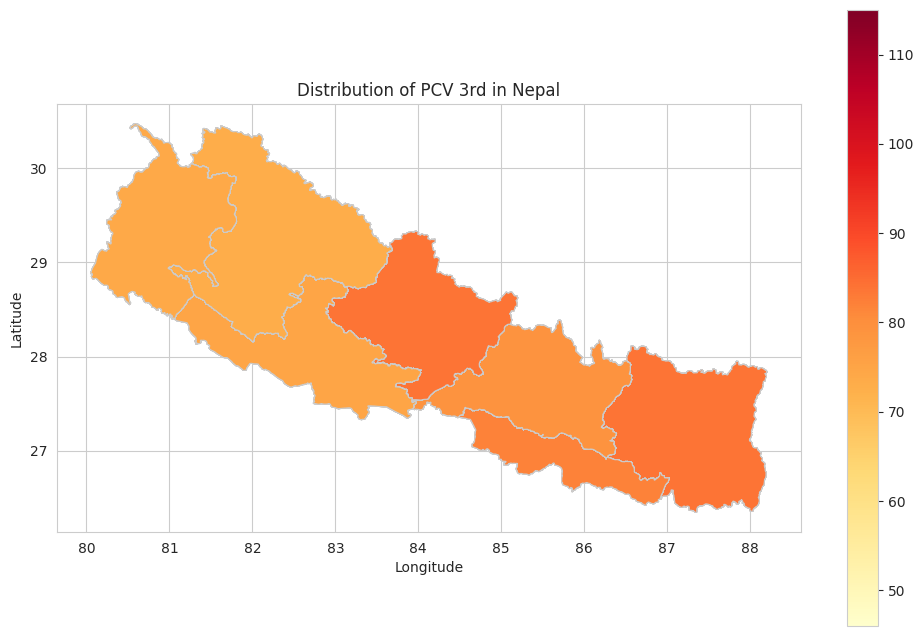

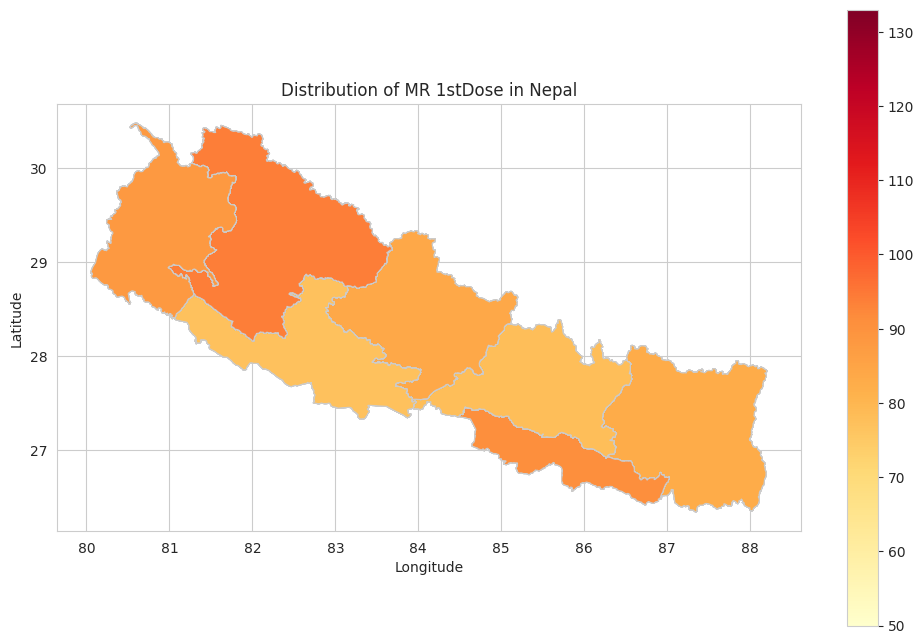

In [97]:


# Load the Nepal map data as a GeoDataFrame
nepal_map = gpd.read_file('Geo-Json-Files/Province.geojson')

# Load the dataset as a pandas DataFrame
dataset = pd.read_csv('final.csv')

# Exclude the "District" column from the dataset
columns_to_plot = dataset.columns.drop(['District Name','Provinces'])


# Iterate over each column in the dataset (excluding "District")
for column_to_plot in columns_to_plot:
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Merge the dataset with the Nepal map based on a common identifier
    merged_data = nepal_map.merge(dataset, left_on='id', right_on='Provinces', how='left')

    # Plot the column on the map
    merged_data.plot(column=column_to_plot, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Set x and y axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Set the plot title
    ax.set_title(f'Distribution of {column_to_plot} in Nepal')

    # Display the plot
    plt.show()


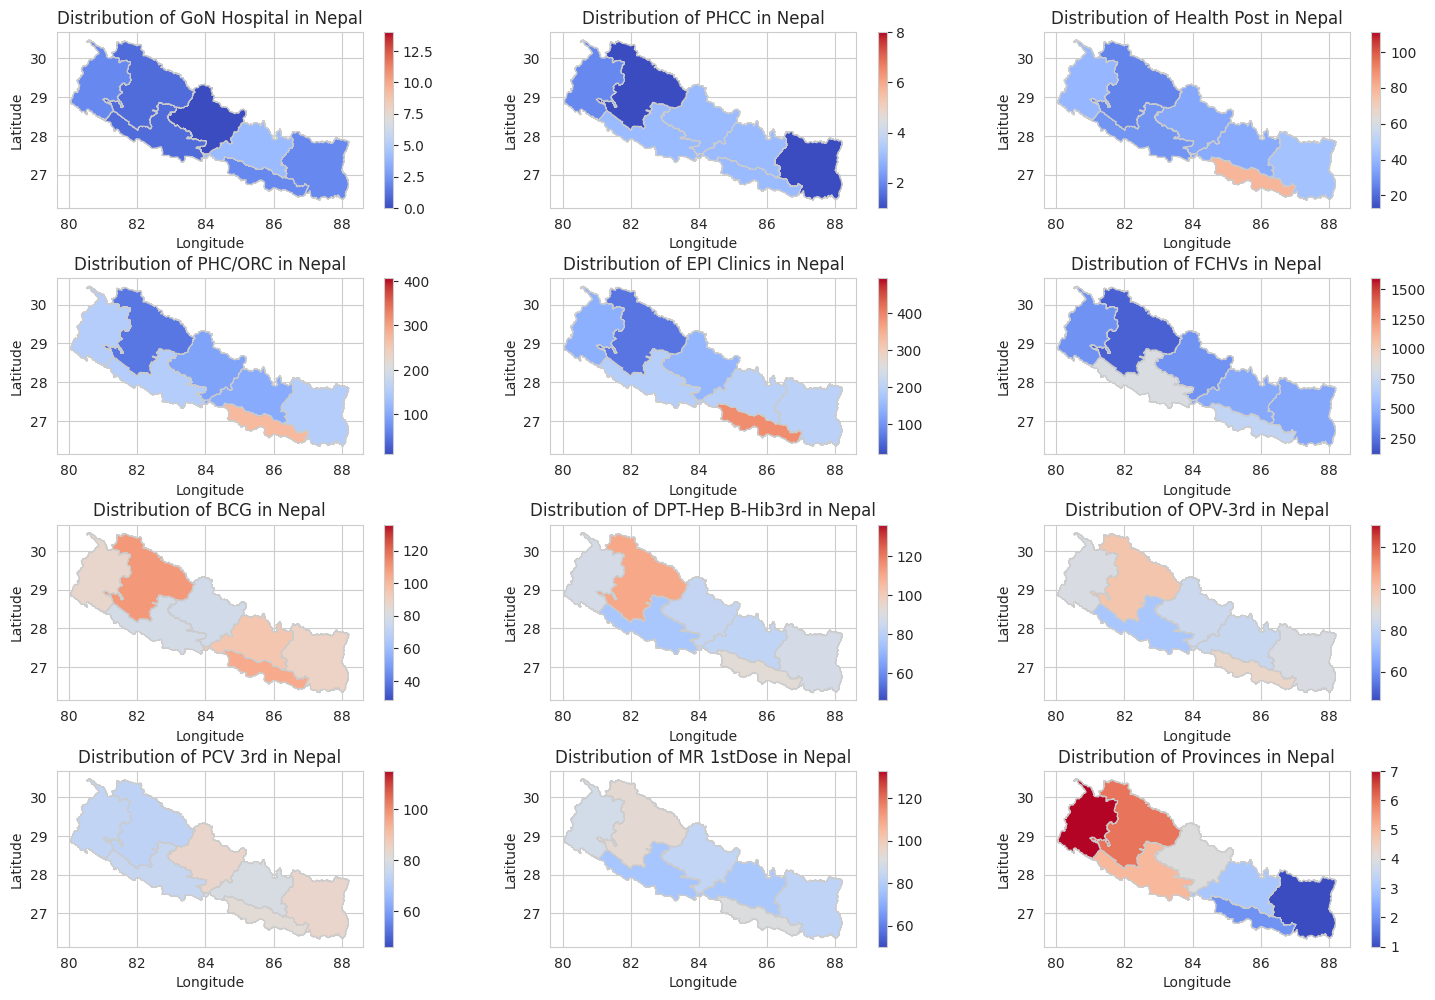

In [91]:


# Load the Nepal map data as a GeoDataFrame
nepal_map = gpd.read_file('Geo-Json-Files/Province.geojson')

# Load the dataset as a pandas DataFrame
dataset = pd.read_csv('final.csv')

# Exclude the "District" column from the dataset
columns_to_plot = dataset.columns.drop(['District Name'])

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over each column in the dataset (excluding "District")
for i, column_to_plot in enumerate(columns_to_plot):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols

    # Select the current subplot
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Merge the dataset with the Nepal map based on a common identifier
    merged_data = nepal_map.merge(dataset, left_on='id', right_on='Provinces', how='left')

    # Plot the column on the map
    merged_data.plot(column=column_to_plot, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Set x and y axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Set the plot title
    ax.set_title(f'Distribution of {column_to_plot} in Nepal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Visualizing distribution throughout the districts

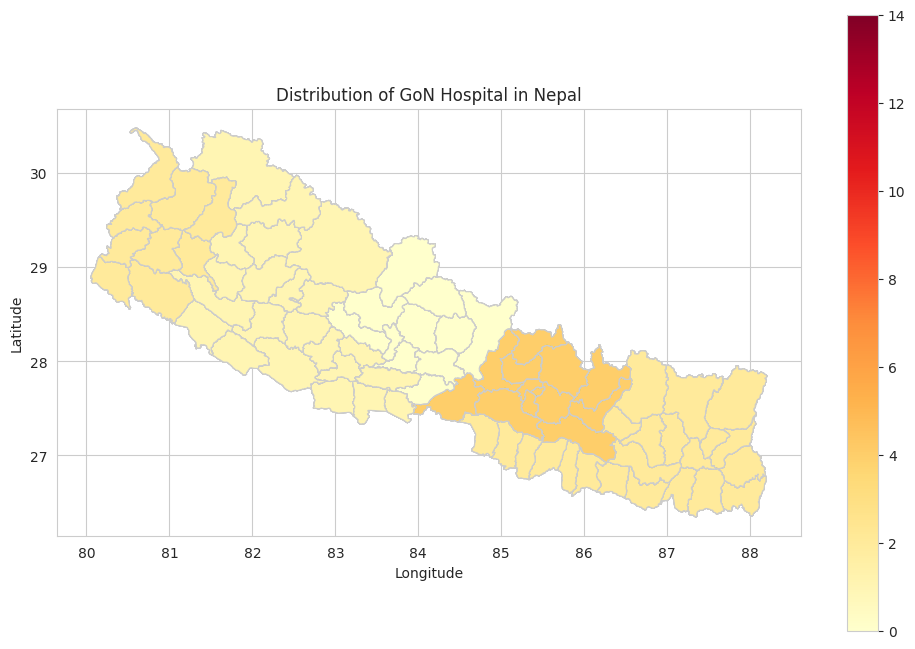

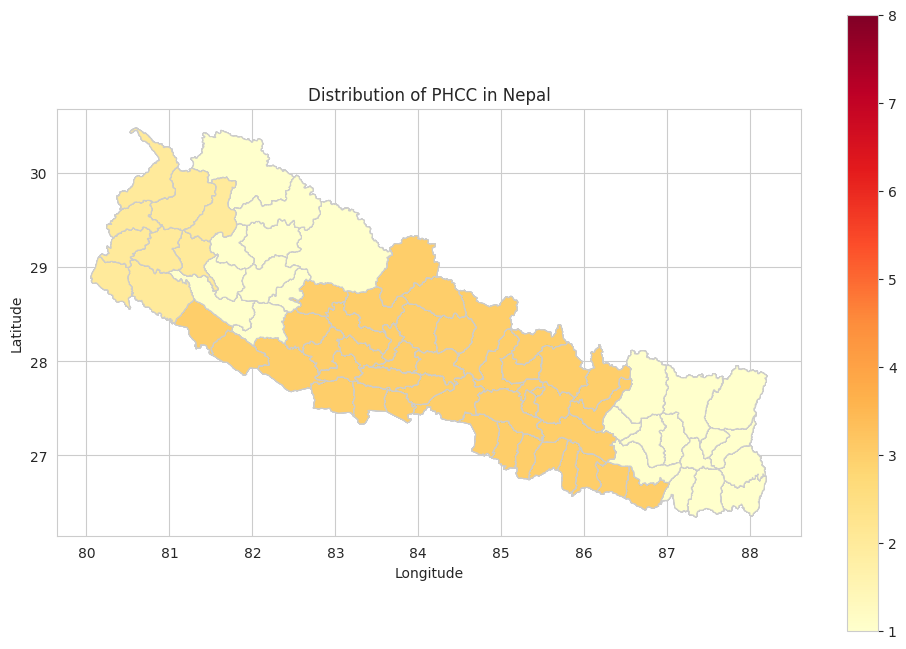

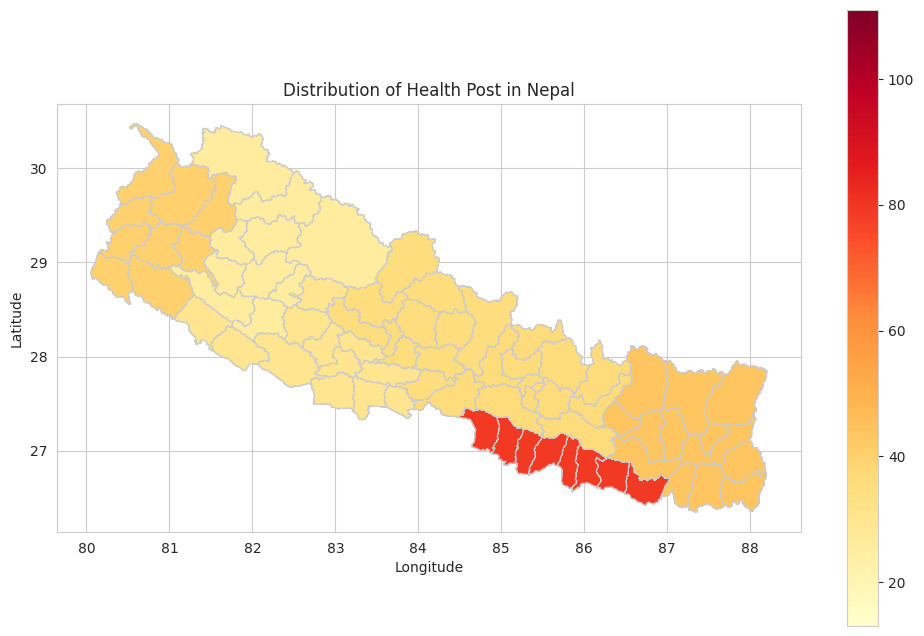

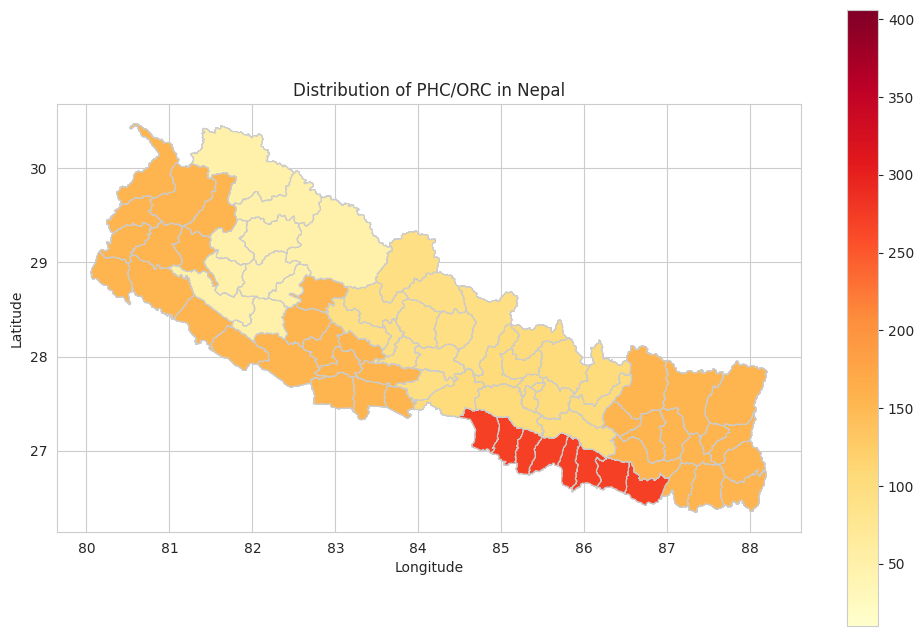

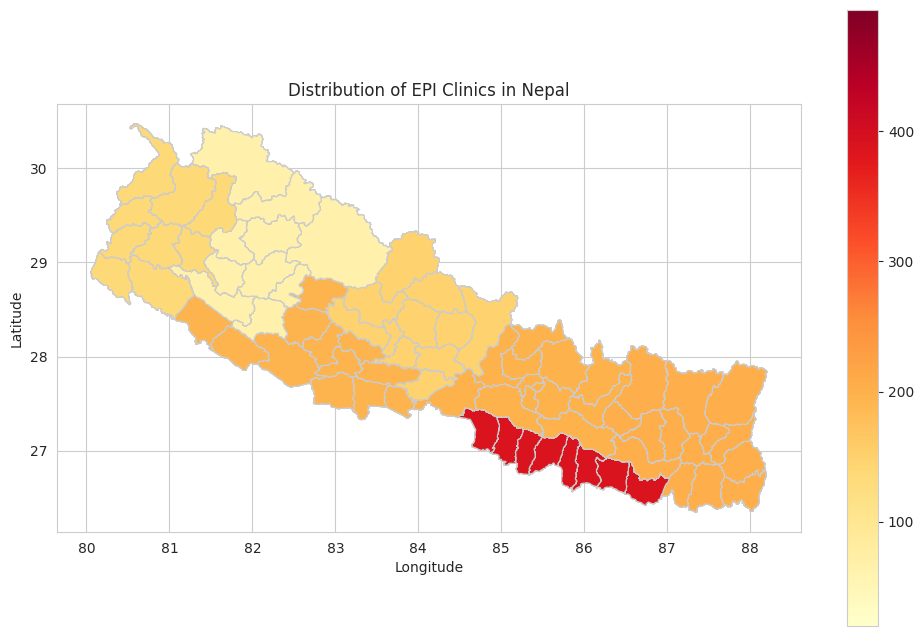

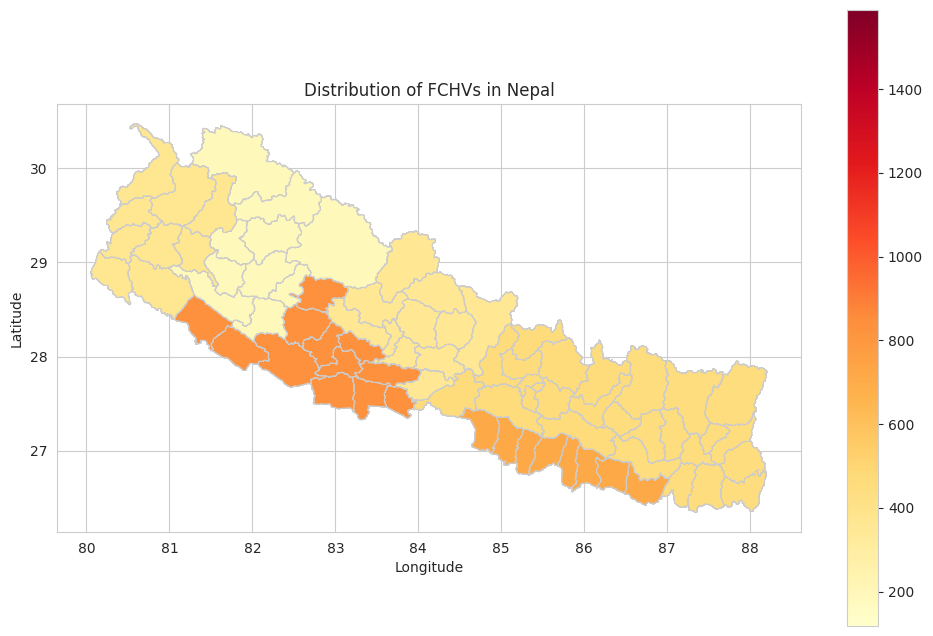

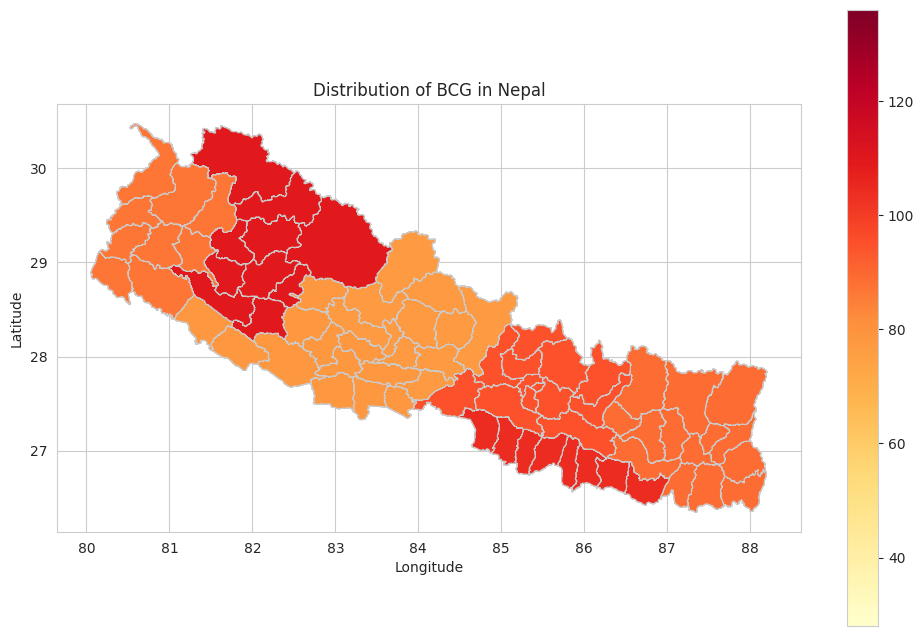

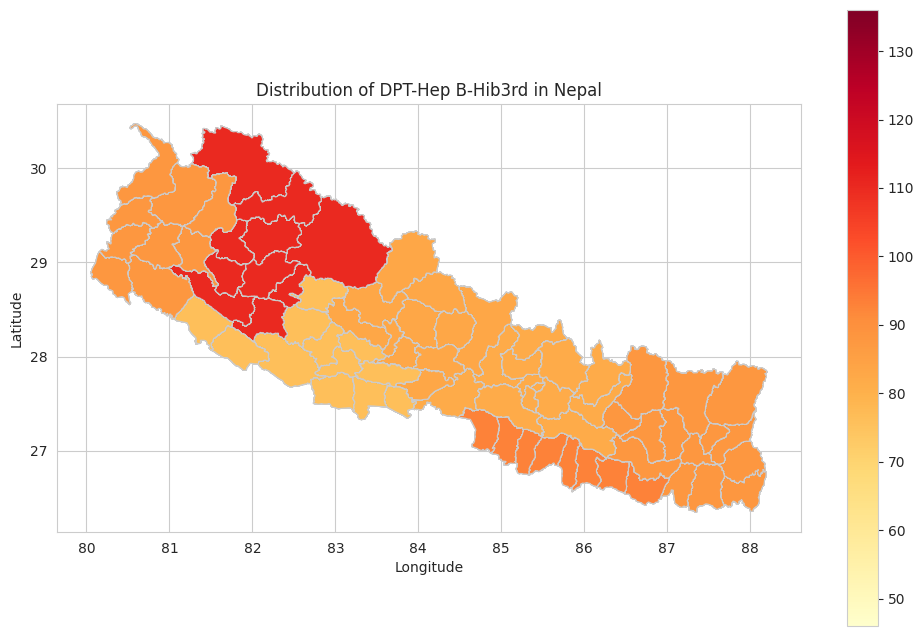

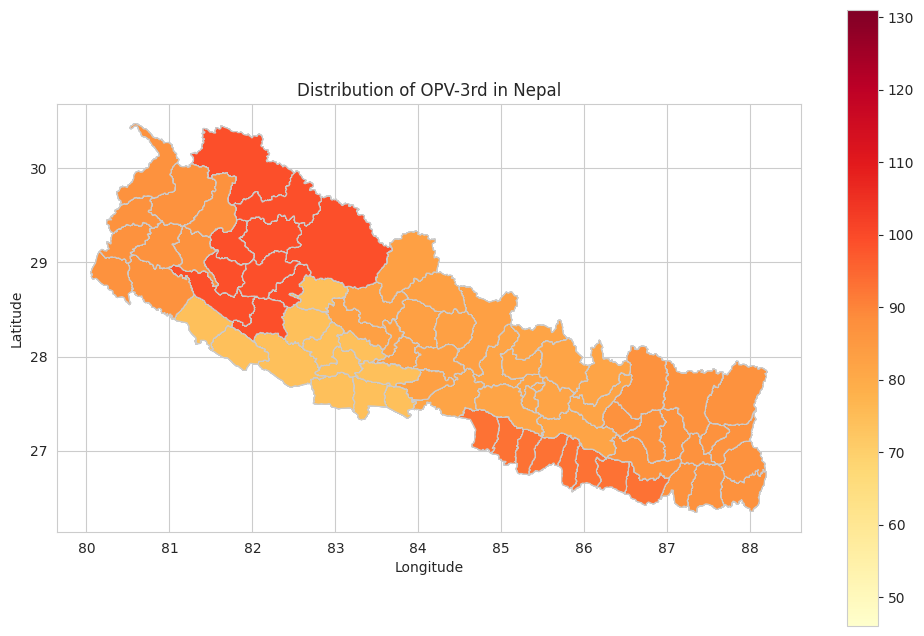

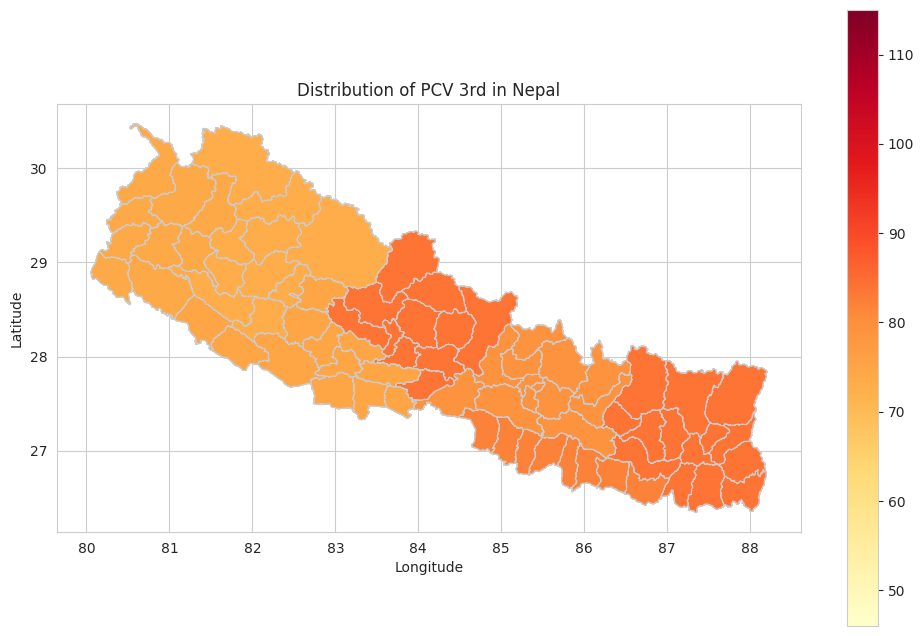

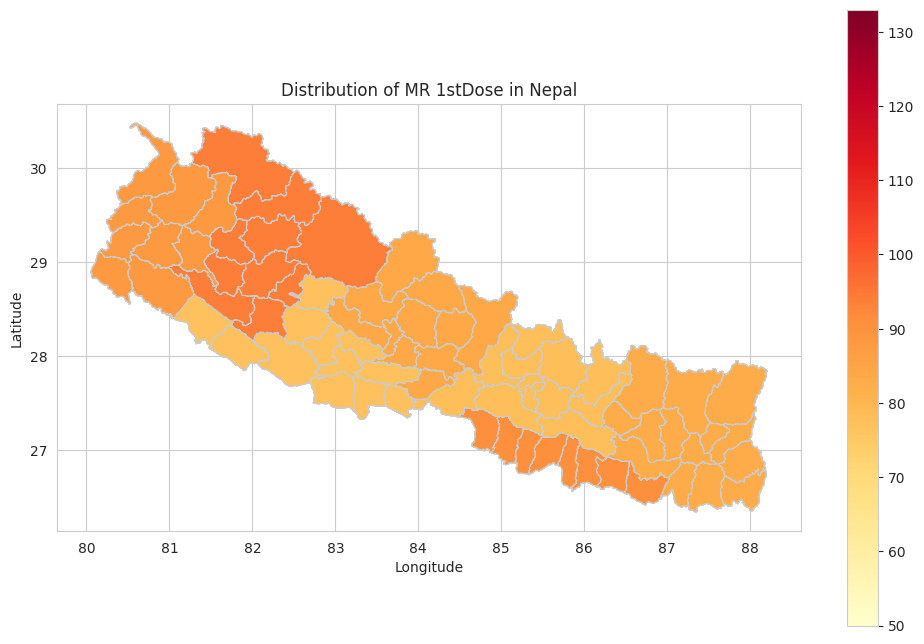

In [92]:

# Load the Nepal map data as a GeoDataFrame
nepal_map = gpd.read_file('Geo-Json-Files/District.geojson')

# Load the dataset as a pandas DataFrame
dataset = pd.read_csv('final.csv')

# Exclude the "District" column from the dataset
columns_to_plot = dataset.columns.drop(['District Name','Provinces'])


# Iterate over each column in the dataset (excluding "District")
for column_to_plot in columns_to_plot:
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Merge the dataset with the Nepal map based on a common identifier
    merged_data = nepal_map.merge(dataset, left_on='PROVINCE', right_on='Provinces', how='left')

    # Plot the column on the map
    merged_data.plot(column=column_to_plot, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Set x and y axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Set the plot title
    ax.set_title(f'Distribution of {column_to_plot} in Nepal')

    # Display the plot
    plt.show()


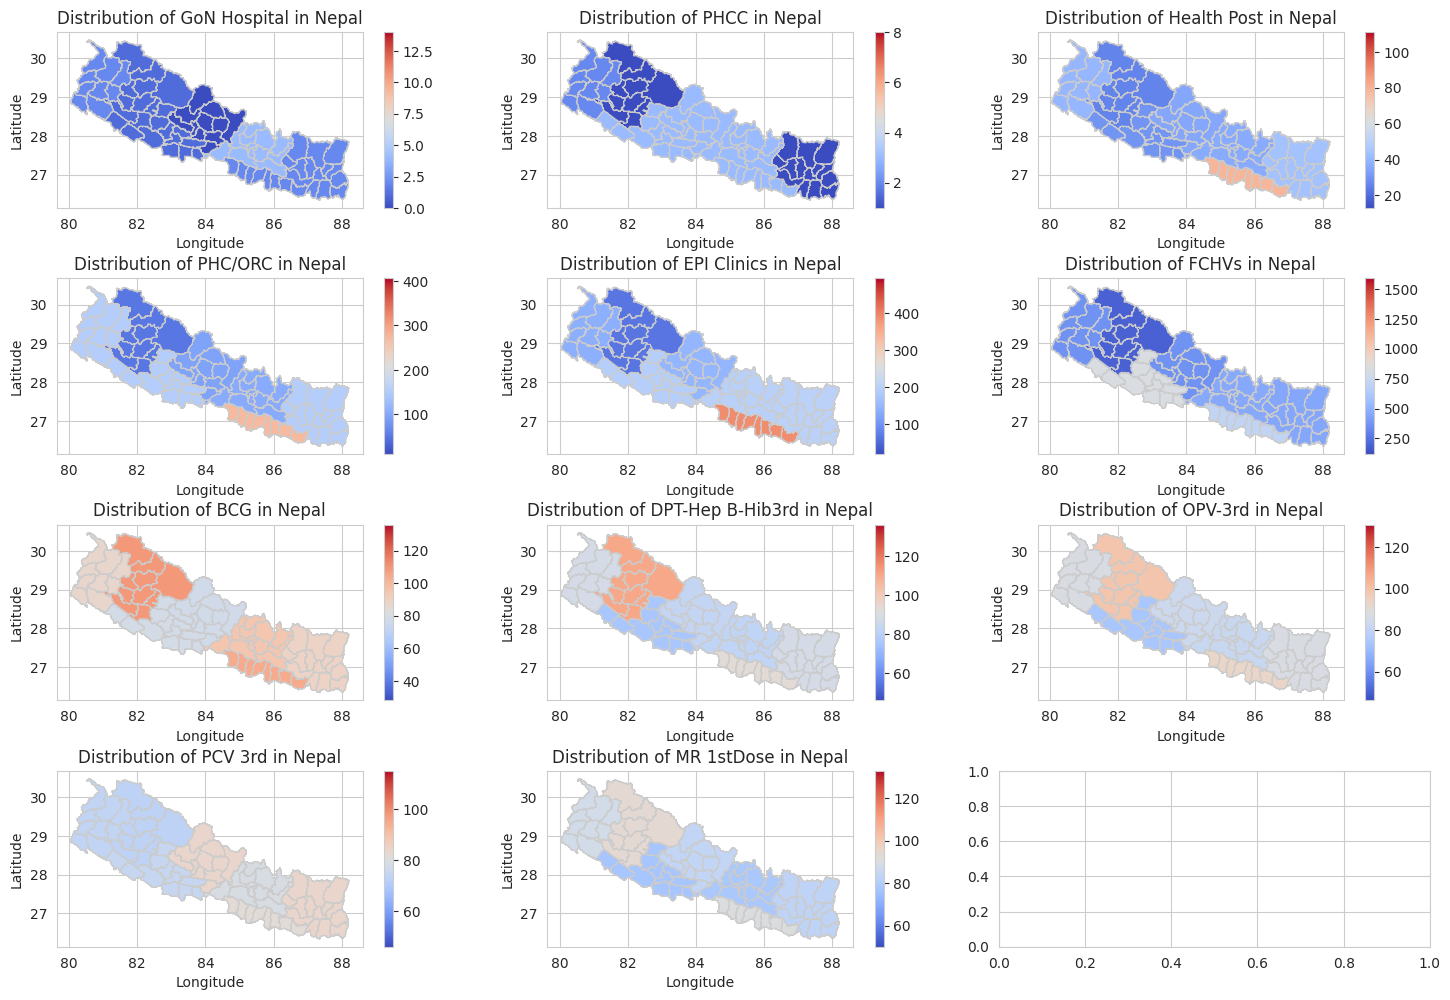

In [93]:


# Load the Nepal map data as a GeoDataFrame
nepal_map = gpd.read_file('Geo-Json-Files/District.geojson')

# Load the dataset as a pandas DataFrame
dataset = pd.read_csv('final.csv')

# Exclude the "District" column from the dataset
columns_to_plot = dataset.columns.drop(['District Name','Provinces'])

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over each column in the dataset (excluding "District")
for i, column_to_plot in enumerate(columns_to_plot):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols

    # Select the current subplot
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Merge the dataset with the Nepal map based on a common identifier
    merged_data = nepal_map.merge(dataset, left_on='PROVINCE', right_on='Provinces', how='left')

    # Plot the column on the map
    merged_data.plot(column=column_to_plot, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Set x and y axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Set the plot title
    ax.set_title(f'Distribution of {column_to_plot} in Nepal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
